# Benson group project - Jack Etheredge

I started over using the solutions for 1-3 as the basis going forward.

*All graphs used in the group talk were generated by me.*

In [125]:
import pandas as pd
import seaborn as sns
from copy import deepcopy
sns.set_style("white")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [126]:
pd.__version__

'0.22.0'

In [127]:
import platform
print(platform.python_version())

3.6.5


#### Exercise 1.1

- Open up a new IPython notebook
- Download a few MTA turnstile data files
- Open up a file, use csv reader to read it and ensure there is a column for each feature (C/A, UNIT, SCP, STATION). These are the first four columns.

In [4]:
htmls=[]
csv_dates = ["180407", "180331", "180324", "180317", "180310", "180303"]
htmls = [f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{date}.txt" for date in csv_dates]
print(htmls)

['http://web.mta.info/developers/data/nyct/turnstile/turnstile_180407.txt', 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180331.txt', 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180324.txt', 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180317.txt', 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180310.txt', 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180303.txt']


In [5]:
print(htmls[0])

http://web.mta.info/developers/data/nyct/turnstile/turnstile_180407.txt


In [6]:
print(htmls[1:])

['http://web.mta.info/developers/data/nyct/turnstile/turnstile_180331.txt', 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180324.txt', 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180317.txt', 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180310.txt', 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_180303.txt']


In [7]:
print(f"Downloading {htmls[0]}")
mta_df = pd.read_csv(htmls[0])
for html in htmls[1:]:
    print(f"Downloading {html}")
    new_mta_df = pd.read_csv(html)
    mta_df = mta_df.append(new_mta_df)

In [8]:
# fix the indexes from appending
df_mta = mta_df.reset_index()
df_mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184282 entries, 0 to 1184281
Data columns (total 12 columns):
index                                                                   1184282 non-null int64
C/A                                                                     1184282 non-null object
UNIT                                                                    1184282 non-null object
SCP                                                                     1184282 non-null object
STATION                                                                 1184282 non-null object
LINENAME                                                                1184282 non-null object
DIVISION                                                                1184282 non-null object
DATE                                                                    1184282 non-null object
TIME                                                                    1184282 non-null object
DESC                    

In [9]:
df_mta_copy = df_mta.copy()
#df_mta = df_mta_copy

In [10]:
# remove the forward slash in C/A column name
df_mta.rename(columns={"C/A": "CA"}, inplace=True)
# fix space issue on exits
df_mta.columns = [column.strip() for column in df_mta.columns]
df_mta.columns

Index(['index', 'CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE',
       'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [11]:
df_mta.head()

,index,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055


In [12]:
# save pickle file

df_mta.to_pickle('df_mta.pickle')

In [160]:
# load from pickle file

#df_mta = pd.read_pickle('df_mta.pickle', compression='infer')

In [161]:
# Six weeks of data
df_mta.DATE.value_counts().sort_index()

02/24/2018    28322
02/25/2018    28124
02/26/2018    28271
02/27/2018    28099
02/28/2018    28339
03/01/2018    28970
03/02/2018    28913
03/03/2018    28127
03/04/2018    28112
03/05/2018    28463
03/06/2018    29116
03/07/2018    28570
03/08/2018    28137
03/09/2018    28591
03/10/2018    28220
03/11/2018    25532
03/12/2018    28575
03/13/2018    28493
03/14/2018    28184
03/15/2018    28198
03/16/2018    28135
03/17/2018    28325
03/18/2018    28193
03/19/2018    28092
03/20/2018    28177
03/21/2018    28183
03/22/2018    28140
03/23/2018    28039
03/24/2018    28143
03/25/2018    28117
03/26/2018    28013
03/27/2018    28137
03/28/2018    28100
03/29/2018    28085
03/30/2018    28059
03/31/2018    28129
04/01/2018    28084
04/02/2018    28049
04/03/2018    28189
04/04/2018    28154
04/05/2018    28262
04/06/2018    28121
Name: DATE, dtype: int64


# Exercise 1.2

- Let's turn this into a time series.

Create a new column that specifies the date and time of each entry.

You can convert the date and time into datetime objects
-- That is a python class that represents a point in time. You can
combine the date and time fields into a string and use the
[dateutil](https://labix.org/python-dateutil) module to convert it
into a datetime object. For an example check
[this StackOverflow question](http://stackoverflow.com/questions/23385003/attributeerror-when-using-import-dateutil-and-dateutil-parser-parse-but-no).

Also, check out this handy [Pandas function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html).

In [162]:
df_mta["datetime_str"] = df_mta.DATE + " " + df_mta.TIME

In [163]:
df_mta["datetime_str"].head()

0    03/31/2018 00:00:00
1    03/31/2018 04:00:00
2    03/31/2018 08:00:00
3    03/31/2018 12:00:00
4    03/31/2018 16:00:00
Name: datetime_str, dtype: object

In [164]:
df_mta["datetime"] = pd.to_datetime(df_mta.datetime_str, infer_datetime_format=True)

# Exercise 1.3

Calculate to total daily entries for each turnstile.

Your result should be a new data frame that has the same keys, but now we have a single
value for a single day, which is the total number of passengers that
entered through this turnstile on this day.

In [165]:
df_mta.head()

,index,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime_str,datetime
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050,03/31/2018 00:00:00,2018-03-31 00:00:00
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053,03/31/2018 04:00:00,2018-03-31 04:00:00
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053,03/31/2018 08:00:00,2018-03-31 08:00:00
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055,03/31/2018 12:00:00,2018-03-31 12:00:00
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055,03/31/2018 16:00:00,2018-03-31 16:00:00


In [166]:
# make a new column that is unique for each turnstile

df_mta["turnstile"] = df_mta["CA"] + " " + df_mta["SCP"]
df_mta.head(15)

,index,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime_str,datetime,turnstile
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050,03/31/2018 00:00:00,2018-03-31 00:00:00,A002 02-00-00
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053,03/31/2018 04:00:00,2018-03-31 04:00:00,A002 02-00-00
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053,03/31/2018 08:00:00,2018-03-31 08:00:00,A002 02-00-00
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055,03/31/2018 12:00:00,2018-03-31 12:00:00,A002 02-00-00
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055,03/31/2018 16:00:00,2018-03-31 16:00:00,A002 02-00-00
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,20:00:00,REGULAR,6566470,2224055,03/31/2018 20:00:00,2018-03-31 20:00:00,A002 02-00-00
6,6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,00:00:00,REGULAR,6566470,2224055,04/01/2018 00:00:00,2018-04-01 00:00:00,A002 02-00-00
7,7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,04:00:00,REGULAR,6566470,2224055,04/01/2018 04:00:00,2018-04-01 04:00:00,A002 02-00-00
8,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,08:00:00,REGULAR,6566470,2224055,04/01/2018 08:00:00,2018-04-01 08:00:00,A002 02-00-00
9,9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,12:00:00,REGULAR,6566470,2224055,04/01/2018 12:00:00,2018-04-01 12:00:00,A002 02-00-00


In [167]:
def find_daily_entries(vector):
    values = vector.values
    if len(values) > 2:
        return values[-1] - values[0]
    else:
        return None

In [168]:
gb_columns = ["turnstile", "DATE"]
# gb_columns = ["turnstile", "DATE", "STATION", "LINENAME", "DIVISION"]
df_mta_day = df_mta.groupby(gb_columns)
#df_mta_day

In [169]:
df_daily_entries = df_mta_day["ENTRIES"] \
                    .aggregate(find_daily_entries) \
                    .reset_index()

In [170]:
df_daily_entries.head(15)

,turnstile,DATE,ENTRIES
0,A002 02-00-00,02/24/2018,609.0
1,A002 02-00-00,02/25/2018,473.0
2,A002 02-00-00,02/26/2018,1384.0
3,A002 02-00-00,02/27/2018,1445.0
4,A002 02-00-00,02/28/2018,1435.0
5,A002 02-00-00,03/01/2018,1320.0
6,A002 02-00-00,03/02/2018,1209.0
7,A002 02-00-00,03/03/2018,685.0
8,A002 02-00-00,03/04/2018,519.0
9,A002 02-00-00,03/05/2018,1379.0


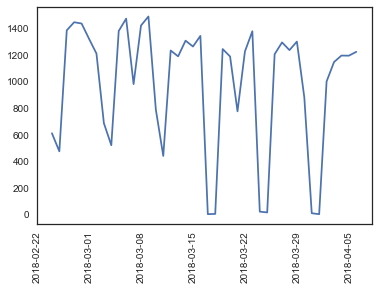

In [172]:
df_toplot = df_daily_entries[df_daily_entries["turnstile"]
                             == "A002 02-00-00"].copy()
df_toplot['DATETIME'] = df_toplot['DATE'].apply(pd.to_datetime)
x = df_toplot["DATETIME"].copy()
y = df_toplot["ENTRIES"].copy()
plt.plot(x, y)
plt.xticks(rotation=90)

(array([ 736747.,  736754.,  736761.,  736768.,  736775.,  736782.,  736789.]),
 <a list of 7 Text xticklabel objects>)

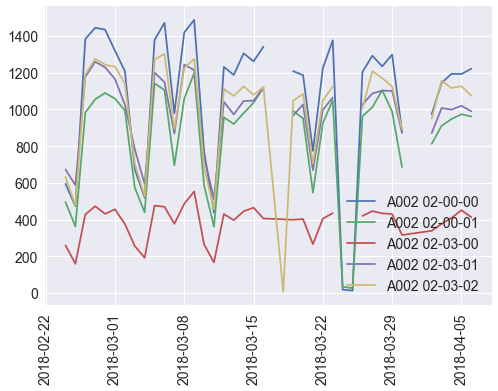

In [378]:
for current_t in df_daily_entries.turnstile.unique()[:5]:
    df_toplot = df_daily_entries.query(f"turnstile == '{current_t}'").copy()
    df_toplot['DATETIME'] = df_toplot['DATE'].apply(pd.to_datetime)
    x = df_toplot["DATETIME"].copy()
    y = df_toplot["ENTRIES"].copy()
    plt.plot(x, y, label=current_t)

legend()
plt.xticks(rotation=90)

## Aside: let's clean up some things

In [178]:
# Sanity Check to verify that "turnstile" and "DATE_TIME" are unique
(df_mta
 .groupby(["turnstile", "datetime_str"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,turnstile,datetime_str,ENTRIES
777743,R135 01-00-00,03/22/2018 08:00:00,2
403687,N183 00-00-00,04/04/2018 05:00:00,2
0,A002 02-00-00,02/24/2018 03:00:00,1
789519,R143 02-03-01,03/07/2018 11:00:00,1
789524,R143 02-03-01,03/08/2018 07:00:00,1


In [179]:
df_mta.query("turnstile == 'R135 01-00-00' and "
             "datetime_str == '03/22/2018 08:00:00'")

,index,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime_str,datetime,turnstile
523148,129506,R135,R031,01-00-00,34 ST-PENN STA,123,IRT,03/22/2018,08:00:00,REGULAR,14789593,20329631,03/22/2018 08:00:00,2018-03-22 08:00:00,R135 01-00-00
523149,129507,R135,R031,01-00-00,34 ST-PENN STA,123,IRT,03/22/2018,08:00:00,RECOVR AUD,14789592,20329631,03/22/2018 08:00:00,2018-03-22 08:00:00,R135 01-00-00


* Looks to be a incorrect AUD entry.  May be we should just select the Regular One.

In [180]:
df_mta.DESC.value_counts()

REGULAR       1178259
RECOVR AUD       6023
Name: DESC, dtype: int64

* Since we are only interested in Entries, we might be OK.

In [181]:
# Get rid of the duplicate entry
df_mta.drop_duplicates(subset=["turnstile", "datetime_str"], inplace=True)

In [182]:
# Sanity Check to verify that "turnstile" and "DATE_TIME" are unique
(df_mta
 .groupby(["turnstile", "datetime_str"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,turnstile,datetime_str,ENTRIES
0,A002 02-00-00,02/24/2018 03:00:00,1
789472,R143 02-03-01,02/27/2018 15:00:00,1
789524,R143 02-03-01,03/08/2018 07:00:00,1
789523,R143 02-03-01,03/08/2018 03:00:00,1
789522,R143 02-03-01,03/07/2018 23:00:00,1


* No more duplicate Entries

okay, now let's look at these entry counts!

In [183]:
df_daily_entries.sort_values("ENTRIES", ascending=False).head(10)

,turnstile,DATE,ENTRIES
175243,R501 00-00-03,04/06/2018,838736200.0
142841,R197 00-00-00,03/21/2018,618323331.0
197496,TRAM2 00-00-00,03/29/2018,3508323.0
28630,G009 02-00-03,03/31/2018,1882093.0
111764,PTH03 00-00-09,03/13/2018,689207.0
93078,N501A 02-06-03,03/21/2018,604468.0
66541,N181 00-06-00,03/25/2018,589834.0
66535,N181 00-06-00,03/19/2018,514733.0
197622,TRAM2 00-03-01,03/29/2018,331197.0
152880,R238 00-03-02,03/15/2018,10565.0


In [184]:
# looks like we have a lot of problems :/ 
print("Very big:", len(df_daily_entries.query("ENTRIES > 20000")))
print("Negative:", len(df_daily_entries.query("ENTRIES < 0")))
print("NaN:", sum(df_daily_entries.ENTRIES.isnull())) # apparently .isna doesn't work because my pandas needs updating?

Very big: 9
Negative: 1745
NaN: 85


In [185]:
# add columns for deltas and previous entry
df_mta["time_delta"] = df_mta.groupby("turnstile")["datetime"].transform(lambda grp: grp - grp.shift(1))
df_mta["entries_last"] = df_mta.groupby("turnstile")["ENTRIES"].transform(lambda grp: grp.shift(1))
df_mta["entries_delta"] = df_mta.groupby("turnstile")["ENTRIES"].transform(lambda grp: grp - grp.shift(1))
df_mta['exits_delta']=df_mta.groupby('turnstile')[['EXITS',]].transform(lambda grp: grp - grp.shift(1))

In [186]:
df_mta["entries_pm"] = 60* df_mta.entries_delta / df_mta.time_delta.dt.seconds

Let's set the max rate at 60 entries per minute, anything above that means that the turnstile was probably reset. In that case we don't know how many entries occured during that time. We have a lot of options of what we could do. 

- In most cases, the best solution is to drop these rows (we don't have to drop the entire day, but we might ultimately want to). 
- We could replace the values with some reasonable default, like zero or the median. This can be especially helpful in cases where the other columns are particularly useful and we don't want to drop rows because of this one.

Let's drop rows where the rate is too high, negative, or NaN.

In [187]:
df_mta.shape

(1184280, 20)

In [188]:
keep = (df_mta.entries_pm < 60) & (df_mta.entries_pm > 0)
df_mta = df_mta[keep]

In [189]:
keep = (df_mta.exits_delta < (4*60*60)) & (df_mta.exits_delta > 0)
df_mta = df_mta[keep]

In [190]:
df_mta.shape

(948944, 20)

In [38]:
df_mta.drop(df_mta[(df_mta['entries_delta'].isnull() == True) | (df_mta['exits_delta'].isnull() == True)].index, inplace=True)

/Users/etheredgej/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [194]:
# keeping only finite values (dropping NaNs)

df_mta = df_mta[np.isfinite(df_mta['entries_delta'])]
df_mta = df_mta[np.isfinite(df_mta['exits_delta'])] 

In [195]:
df_mta.shape

(948944, 20)

In [345]:
df_mta.head(5)

,index,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,...,datetime_str,datetime,turnstile,time_delta,entries_last,entries_delta,exits_delta,entries_pm,total_traffic,weekday
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,...,03/31/2018 04:00:00,2018-03-31 04:00:00,A002 02-00-00,04:00:00,6566463.0,7.0,3.0,0.029167,10.0,Saturday
14,14,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,08:00:00,REGULAR,...,04/02/2018 08:00:00,2018-04-02 08:00:00,A002 02-00-00,04:00:00,6566470.0,25.0,87.0,0.104167,112.0,Monday
15,15,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,12:00:00,REGULAR,...,04/02/2018 12:00:00,2018-04-02 12:00:00,A002 02-00-00,04:00:00,6566495.0,134.0,208.0,0.558333,342.0,Monday
16,16,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,16:00:00,REGULAR,...,04/02/2018 16:00:00,2018-04-02 16:00:00,A002 02-00-00,04:00:00,6566629.0,210.0,56.0,0.875000,266.0,Monday
17,17,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,20:00:00,REGULAR,...,04/02/2018 20:00:00,2018-04-02 20:00:00,A002 02-00-00,04:00:00,6566839.0,630.0,66.0,2.625000,696.0,Monday


In [197]:
# remaking these two dfs from the updated df_mta
df_mta_day = df_mta.groupby(["turnstile", "DATE"])
df_daily_entries = df_mta_day["ENTRIES"] \
                    .aggregate(find_daily_entries) \
                    .reset_index() 

In [198]:
print("Very big:", len(df_daily_entries.query("ENTRIES > 20000")))
print("Negative:", len(df_daily_entries.query("ENTRIES < 0")))
print("NaN:", sum(df_daily_entries.ENTRIES.isnull()))
# I don't know why these values are still in here. I thought we had removed them all. These should all return 0.

Very big: 7
Negative: 49
NaN: 2701


In [199]:
df_daily_entries.head()

,turnstile,DATE,ENTRIES
0,A002 02-00-00,02/24/2018,595.0
1,A002 02-00-00,02/25/2018,473.0
2,A002 02-00-00,02/26/2018,1384.0
3,A002 02-00-00,02/27/2018,1445.0
4,A002 02-00-00,02/28/2018,1435.0


In [200]:
df_daily_entries.tail()

,turnstile,DATE,ENTRIES
169844,TRAM2 00-03-01,04/02/2018,268.0
169845,TRAM2 00-03-01,04/03/2018,242.0
169846,TRAM2 00-03-01,04/04/2018,314.0
169847,TRAM2 00-03-01,04/05/2018,240.0
169848,TRAM2 00-03-01,04/06/2018,337.0


In [210]:
df_date_04_02_2018 = df_daily_entries.loc[df_daily_entries['DATE'] == '04/02/2018']
df_date_04_02_2018.head()

,turnstile,DATE,ENTRIES
35,A002 02-00-00,04/02/2018,974.0
75,A002 02-00-01,04/02/2018,813.0
112,A002 02-03-00,04/02/2018,339.0
152,A002 02-03-01,04/02/2018,872.0
191,A002 02-03-02,04/02/2018,950.0


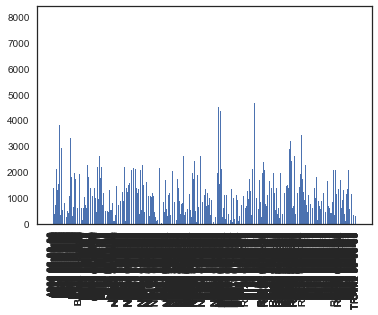

In [211]:
# plot the turnstile entries for every turnstile

samples_x = df_date_04_02_2018["turnstile"]
values_y = df_date_04_02_2018["ENTRIES"]
x = range(0,len(samples_x))
y = values_y
low = 0
high = max(y)*1.1
plt.ylim([low, high])
plt.bar(x, y)


LABELS = samples_x

plt.xticks(x, LABELS, rotation=90);

In [212]:
# Drop rows for first date
df_mta2 = df_mta.dropna(subset=["entries_last"], axis=0)

In [213]:
df_mta2[df_mta2["ENTRIES"] < df_mta2["entries_last"]].head()
# no rows match this pattern because we've successfully removed them a few steps ago.

,index,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime_str,datetime,turnstile,time_delta,entries_last,entries_delta,exits_delta,entries_pm


In [214]:
df_mta['total_traffic']=df_mta['entries_delta']+df_mta['exits_delta']

In [294]:
ca_traffic=df_mta.groupby('CA').sum().sort_values(by='total_traffic', ascending=False)

In [295]:
ca_traffic.total_traffic.head()

CA
PTH22    3495735.0
R238     3304339.0
R533     2586005.0
R138     2512456.0
N324     2404940.0
Name: total_traffic, dtype: float64

In [296]:
ca_traffic.index

Index(['PTH22', 'R238', 'R533', 'R138', 'N324', 'H009', 'N051', 'R221', 'R240',
       'N506',
       ...
       'N551', 'R262A', 'N554', 'N186', 'N553', 'N183', 'R262B', 'S101A',
       'S101', 'S102'],
      dtype='object', name='CA', length=735)

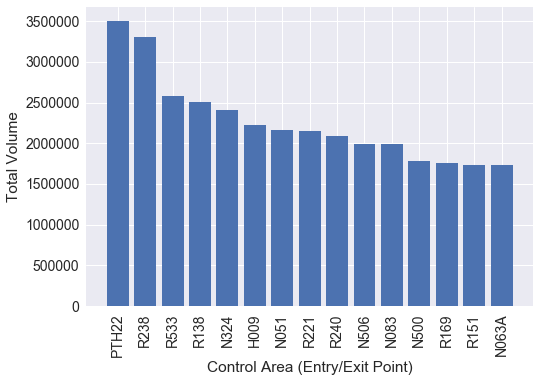

In [297]:
x = range(0,len(ca_traffic.index[:15]))
y = ca_traffic.total_traffic[:15]
plt.bar(x, y)
plt.xlabel('Control Area (Entry/Exit Point)')
plt.ylabel('Total Volume')
LABELS = ca_traffic.index[:15]

plt.xticks(x, LABELS, rotation=90);

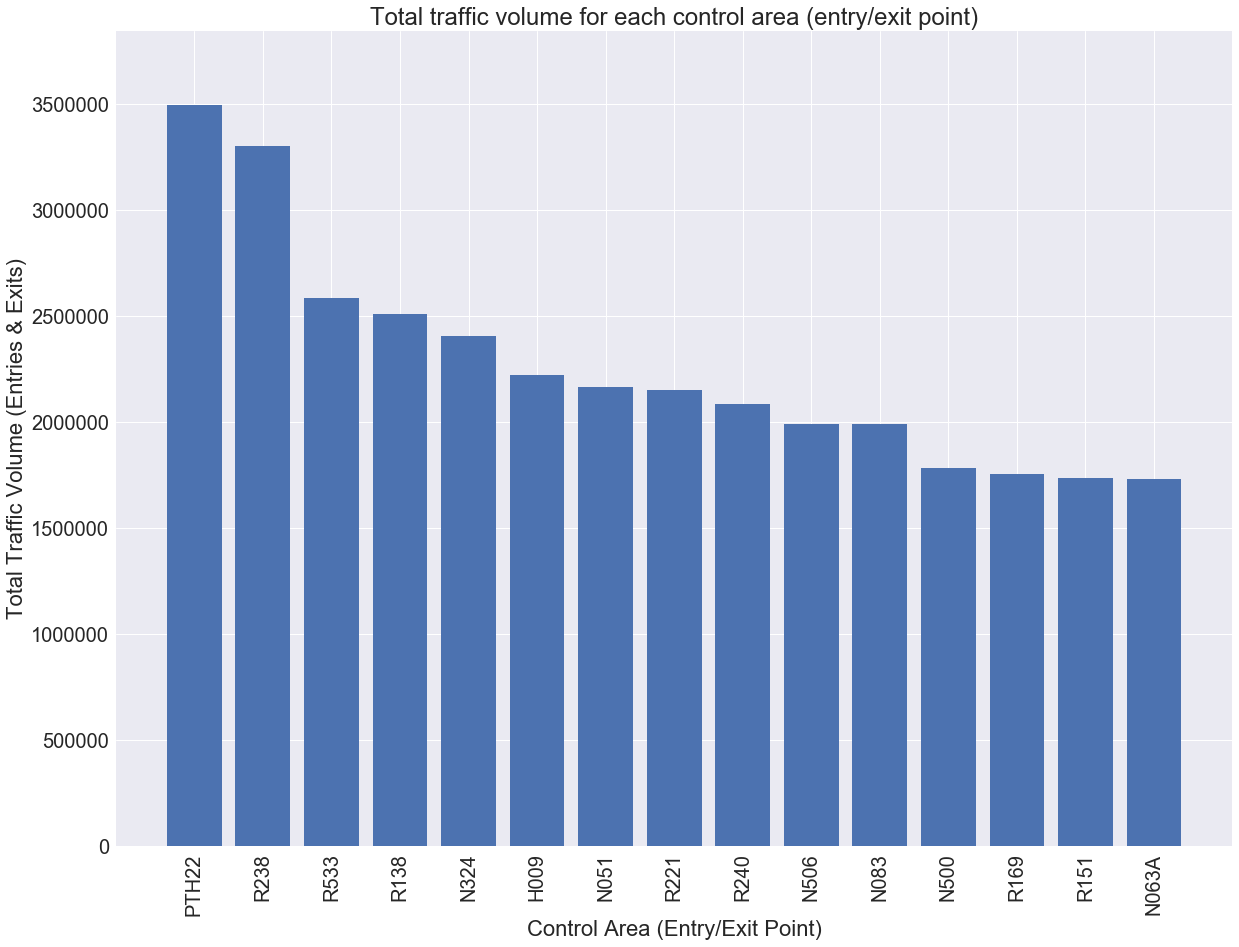

In [341]:
samples_x = ca_traffic.index[:15]
values_y = ca_traffic.total_traffic[:15]
x = range(0,len(samples_x))
y = values_y
low = 0
high = max(y)*1.1
sns.set(font_scale=2)
plt.figure(figsize=(20,15))
ax=subplot(111)
LABELS = samples_x
ax.bar(x, y)
plt.ylim([low, high])
plt.xlabel('Control Area (Entry/Exit Point)')
plt.ylabel('Total Traffic Volume (Entries & Exits)')

title = 'Total traffic volume for each control area (entry/exit point)'
savepath='/Users/etheredgej/ds/metis/metisgh/'

plt.title(title)
plt.xticks(x, LABELS, rotation=90);
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'.pdf', bbox_inches="tight")

In [224]:
ca_traffic = ca_traffic.reset_index()

In [225]:
CAlist = list(ca_traffic['CA'][:15])
print(CAlist)

['PTH22', 'R238', 'R533', 'R138', 'N324', 'H009', 'N051', 'R221', 'R240', 'N506', 'N083', 'N500', 'R169', 'R151', 'N063A']


In [227]:
station_CA_pairs = df_mta[df_mta['CA'].isin(CAlist)].copy()
station_CA_pairs["station_CA_pairs"] = station_CA_pairs["CA"] + " @ " + station_CA_pairs["STATION"]
print(station_CA_pairs["station_CA_pairs"].unique())

['H009 @ BEDFORD AV' 'N051 @ 59 ST COLUMBUS' 'N063A @ 42 ST-PORT AUTH'
 'N083 @ W 4 ST-WASH SQ' 'N324 @ JKSN HT-ROOSVLT' 'N500 @ 47-50 STS ROCK'
 'N506 @ 34 ST-HERALD SQ' 'PTH22 @ PATH NEW WTC' 'R138 @ 34 ST-PENN STA'
 'R151 @ TIMES SQ-42 ST' 'R169 @ 96 ST' 'R221 @ 14 ST-UNION SQ'
 'R238 @ GRD CNTRL-42 ST' 'R240 @ GRD CNTRL-42 ST' 'R533 @ FLUSHING-MAIN']


In [231]:
station_traffic_daily_sorted=df_mta.groupby(['STATION','DATE']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()

In [232]:
station_traffic_daily_sorted.head()

,STATION,DATE,index,ENTRIES,EXITS,entries_last,entries_delta,exits_delta,entries_pm,total_traffic
0,34 ST-PENN STA,03/15/2018,45988918,20875871563,17496135251,2.087569e+10,182192.0,153083.0,754.264583,335275.0
1,34 ST-PENN STA,03/29/2018,45995659,20744523390,17445549872,2.074434e+10,180004.0,153545.0,750.016667,333549.0
2,34 ST-PENN STA,04/05/2018,46822671,20997546680,17516276899,2.099737e+10,175714.0,151079.0,739.147367,326793.0
3,34 ST-PENN STA,03/28/2018,46149969,20961645395,17443277460,2.096147e+10,177101.0,148173.0,737.377083,325274.0
4,34 ST-PENN STA,03/06/2018,47512372,21969498952,18894280404,2.196932e+10,176653.0,148079.0,796.557515,324732.0


In [128]:
(df_mta
 .sort_values(by=['total_traffic'], ascending=[False])
 .groupby(['CA','STATION'])
 .head(15))



(df_mta
 .sort_values(by=['total_traffic'], ascending=[False])
 .groupby(['CA','STATION'])
 .head(15))

,index,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,...,EXITS,datetime_str,datetime,turnstile,time_delta,entries_last,entries_delta,exits_delta,entries_pm,total_traffic
930545,144417,R201,R041,00-00-00,BOWLING GREEN,45,IRT,03/09/2018,07:00:00,REGULAR,...,2145850214,03/09/2018 07:00:00,2018-03-09 07:00:00,R201 00-00-00,0 days 04:00:00,2.345327e+06,5.0,2.145033e+09,0.020833,2.145033e+09
313504,116516,PTH13,R541,00-04-07,THIRTY ST,1,PTH,03/24/2018,00:56:50,REGULAR,...,3319295,03/24/2018 00:56:50,2018-03-24 00:56:50,PTH13 00-04-07,-14 days +02:42:43,1.000000e+00,3.0,3.307695e+06,0.018437,3.307698e+06
1102715,117471,PTH12,R542,00-04-02,TWENTY THIRD ST,1,PTH,02/24/2018,00:50:26,REGULAR,...,337096,02/24/2018 00:50:26,2018-02-24 00:50:26,PTH12 00-04-02,-14 days +04:29:47,1.800000e+01,12372.0,3.324880e+05,45.859023,3.448600e+05
907798,121670,PTH20,R549,03-01-05,NEWARK HM HE,1,PTH,03/03/2018,02:29:54,REGULAR,...,118537,03/03/2018 02:29:54,2018-03-03 02:29:54,PTH20 03-01-05,-14 days +02:52:21,0.000000e+00,447.0,1.133320e+05,2.593560,1.137790e+05
695113,104322,N601,R319,00-00-01,LEXINGTON AV/63,F,IND,03/10/2018,03:00:00,REGULAR,...,46112430,03/10/2018 03:00:00,2018-03-10 03:00:00,N601 00-00-01,-14 days +07:00:00,1.759213e+09,24720.0,4.322400e+04,58.857143,6.794400e+04
892336,106208,N601,R319,00-00-01,LEXINGTON AV/63,F,IND,03/03/2018,03:00:00,REGULAR,...,46132265,03/03/2018 03:00:00,2018-03-03 03:00:00,N601 00-00-01,-14 days +07:00:00,1.759226e+09,22891.0,4.004500e+04,54.502381,6.293600e+04
317583,120595,PTH22,R540,00-00-00,PATH NEW WTC,1,PTH,03/24/2018,02:34:05,REGULAR,...,64482,03/24/2018 02:34:05,2018-03-24 02:34:05,PTH22 00-00-00,-14 days +04:20:53,1.375000e+03,4477.0,4.978900e+04,17.160928,5.426600e+04
115727,115727,PTH10,R547,00-00-04,9TH STREET,1,PTH,04/02/2018,16:05:33,REGULAR,...,40518,04/02/2018 16:05:33,2018-04-02 16:05:33,PTH10 00-00-04,0 days 02:57:43,0.000000e+00,4875.0,3.974600e+04,27.431305,4.462100e+04
318812,121824,PTH22,R540,00-03-07,PATH NEW WTC,1,PTH,03/24/2018,10:42:27,REGULAR,...,25684,03/24/2018 10:42:27,2018-03-24 10:42:27,PTH22 00-03-07,-14 days +12:46:50,3.470000e+03,17750.0,2.244300e+04,23.147142,4.019300e+04
809340,23212,C021,R212,00-00-02,59 ST,NRW,BMT,03/03/2018,03:00:00,REGULAR,...,703090236,03/03/2018 03:00:00,2018-03-03 03:00:00,C021 00-00-02,-14 days +07:00:00,2.030390e+09,24478.0,1.376400e+04,58.280952,3.824200e+04


In [228]:
total_sum = df_mta.groupby(['CA', 'STATION']).sum().reset_index().copy()
total_sum.head(15)

,CA,STATION,index,ENTRIES,EXITS,entries_last,entries_delta,exits_delta,entries_pm,total_traffic
0,A002,59 ST,422785,11461140566,5684982659,1.146073e+10,408070.0,256762.0,1699.871667,664832.0
1,A006,5 AV/59 ST,1039014,9613019630,9547236592,9.612676e+09,343771.0,253792.0,1434.808312,597563.0
2,A007,5 AV/59 ST,782602,26776956049,2526457625,2.677682e+10,140900.0,98013.0,587.050833,238913.0
3,A010,57 ST-7 AV,2463861,19771569576,6125125981,1.977086e+10,710200.0,249178.0,2966.401413,959378.0
4,A011,57 ST-7 AV,1569559,393438276166,326800688398,3.934379e+11,371721.0,326932.0,1567.117095,698653.0
5,A013,49 ST,1722730,5067037400,11091599887,5.066836e+09,201861.0,282755.0,839.420417,484616.0
6,A014,49 ST,2187424,2570899750,9777239163,2.570753e+09,146632.0,201653.0,609.816250,348285.0
7,A015,49 ST,3272880,9779191874,9148966839,9.778833e+09,359279.0,181514.0,1499.850921,540793.0
8,A016,49 ST,2878636,19510364074,2573221117,1.951015e+10,216848.0,100290.0,910.277468,317138.0
9,A021,TIMES SQ-42 ST,5509620,5008272821,7492754074,5.007746e+09,527070.0,750246.0,2224.707338,1277316.0


In [242]:
station_total_traffic_by_date = df_mta.groupby(
    ['STATION', 'DATE']).total_traffic.sum().reset_index().copy()
station_total_traffic_by_date_sorted = station_total_traffic_by_date.sort_values(
    by='total_traffic', ascending=False).copy()
station_total_traffic_by_date_sorted.head()

,STATION,DATE,total_traffic
2507,34 ST-PENN STA,03/15/2018,335275.0
2521,34 ST-PENN STA,03/29/2018,333549.0
2528,34 ST-PENN STA,04/05/2018,326793.0
2520,34 ST-PENN STA,03/28/2018,325274.0
2498,34 ST-PENN STA,03/06/2018,324732.0


In [90]:
# scaling plots in the future:
#plt.rcParams['figure.figsize'] = [10, 6]
#matplotlib.rcParams.update({'font.size': 40})
def scale_plot_size(factor=4):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor

In [237]:
ca_traffic2=df_mta.groupby(['CA', 'DATE']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()

In [238]:
ca_traffic2.head(15)

,CA,DATE,index,ENTRIES,EXITS,entries_last,entries_delta,exits_delta,entries_pm,total_traffic
0,PTH22,03/28/2018,28668347,34126885,34572137,34064630.0,62255.0,57482.0,242.455665,119737.0
1,PTH22,02/27/2018,28120552,31308600,28782508,31248786.0,59814.0,59125.0,237.370112,118939.0
2,PTH22,03/27/2018,29149415,34258871,35140645,34196394.0,62477.0,56446.0,248.048135,118923.0
3,PTH22,02/26/2018,28607879,30961786,28473991,30902912.0,58874.0,60041.0,233.626984,118915.0
4,PTH22,03/15/2018,28926923,36282163,33348930,36221031.0,61132.0,54266.0,242.275833,115398.0
5,PTH22,02/28/2018,29229054,34502978,30316760,34441853.0,61125.0,54075.0,242.559524,115200.0
6,PTH22,03/06/2018,28645176,33251414,31126359,33190903.0,60511.0,54550.0,239.838609,115061.0
7,PTH22,03/20/2018,28997176,34310304,34168382,34249499.0,60805.0,53644.0,239.075364,114449.0
8,PTH22,03/14/2018,28567155,35643953,32526764,35584195.0,59758.0,54373.0,237.366853,114131.0
9,PTH22,03/01/2018,29723896,33613322,30602628,33553069.0,60253.0,53609.0,239.099206,113862.0


In [240]:
station_CA_pairs = df_mta[df_mta['CA'].isin(CAlist)].copy()
station_CA_pairs["station_CA_pairs"] = station_CA_pairs["CA"] + " @ " + station_CA_pairs["STATION"]
#station_CA_pairs["station_CA_pairs"].unique()
ca_traffic_top_15_by_date = station_CA_pairs.groupby(['station_CA_pairs', 'DATE']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()

In [278]:
# get a list of top 15 most trafficked CAs summing across all dates

CA_traffic_sum = df_mta.groupby(['CA']).sum().sort_values(
    by='total_traffic', ascending=False).reset_index().copy()
CA_traffic_sum_top_15 = CA_traffic_sum.head(15).copy()
CA_traffic_sum_top_15_list = CA_traffic_sum_top_15.CA.unique()
print(CA_traffic_sum_top_15_list)

['PTH22' 'R238' 'R533' 'R138' 'N324' 'H009' 'N051' 'R221' 'R240' 'N506'
 'N083' 'N500' 'R169' 'R151' 'N063A']


In [279]:
station_CA_pairs = df_mta[df_mta['CA'].isin(CA_traffic_sum_top_15_list)].copy()
station_CA_pairs["station_CA_pairs"] = station_CA_pairs["CA"] + " @ " + station_CA_pairs["STATION"]
#station_CA_pairs["station_CA_pairs"].unique()
ca_traffic_top_15_by_date = station_CA_pairs.groupby(['station_CA_pairs', 'DATE']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()

In [ ]:
# groupby STATION and CA
# groupby STATION and line name
# group by all 3
# check whether they're all the same shape

In [241]:
ca_traffic_top_15_by_date.shape
ca_traffic_top_15_by_date.head(6)

,station_CA_pairs,DATE,index,ENTRIES,EXITS,entries_last,entries_delta,exits_delta,entries_pm,total_traffic
0,PTH22 @ PATH NEW WTC,03/28/2018,28668347,34126885,34572137,34064630.0,62255.0,57482.0,242.455665,119737.0
1,PTH22 @ PATH NEW WTC,02/27/2018,28120552,31308600,28782508,31248786.0,59814.0,59125.0,237.370112,118939.0
2,PTH22 @ PATH NEW WTC,03/27/2018,29149415,34258871,35140645,34196394.0,62477.0,56446.0,248.048135,118923.0
3,PTH22 @ PATH NEW WTC,02/26/2018,28607879,30961786,28473991,30902912.0,58874.0,60041.0,233.626984,118915.0
4,PTH22 @ PATH NEW WTC,03/15/2018,28926923,36282163,33348930,36221031.0,61132.0,54266.0,242.275833,115398.0
5,PTH22 @ PATH NEW WTC,02/28/2018,29229054,34502978,30316760,34441853.0,61125.0,54075.0,242.559524,115200.0


In [152]:
#df_forheatmap=df_mta.groupby(['CA', 'DATE']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()
#df_forheatmap = groupby
#df = pd.DataFrame(ca_traffic_top_15_by_date['total_traffic'], index = ca_traffic_top_15_by_date['station_CA_pairs'], columns=ca_traffic_top_15_by_date['DATE'])

DATE,02/24/2018,02/25/2018,02/26/2018,02/27/2018,02/28/2018,03/01/2018,03/02/2018,03/03/2018,03/04/2018,03/05/2018,...,03/28/2018,03/29/2018,03/30/2018,03/31/2018,04/01/2018,04/02/2018,04/03/2018,04/04/2018,04/05/2018,04/06/2018
station_CA_pairs,,,,,,,,,,,,,,,,,,,,,
H009 @ BEDFORD AV,50447.0,41985.0,54576.0,57698.0,58442.0,57281.0,49155.0,52693.0,44471.0,54603.0,...,57997.0,61002.0,58225.0,53388.0,43634.0,47614.0,53265.0,55743.0,58479.0,59819.0
N051 @ 59 ST COLUMBUS,31265.0,25696.0,62138.0,64361.0,64884.0,64924.0,55196.0,30495.0,26301.0,59724.0,...,66106.0,66162.0,53578.0,29135.0,28085.0,49719.0,58453.0,58390.0,59764.0,56321.0
N083 @ W 4 ST-WASH SQ,34511.0,36338.0,47641.0,53928.0,56244.0,56797.0,51762.0,34422.0,38215.0,48223.0,...,55190.0,58595.0,55322.0,34378.0,33579.0,46739.0,53257.0,54830.0,57621.0,57720.0
N324 @ JKSN HT-ROOSVLT,46338.0,37472.0,65580.0,67036.0,67327.0,67656.0,59667.0,50231.0,42279.0,67617.0,...,66561.0,66097.0,58446.0,39754.0,38579.0,55245.0,60310.0,61164.0,63806.0,62351.0
N500 @ 47-50 STS ROCK,13504.0,10026.0,53013.0,54275.0,54734.0,53793.0,53863.0,12020.0,10972.0,52968.0,...,59003.0,58039.0,45245.0,13719.0,16455.0,51352.0,59324.0,57191.0,60667.0,55761.0


In [314]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

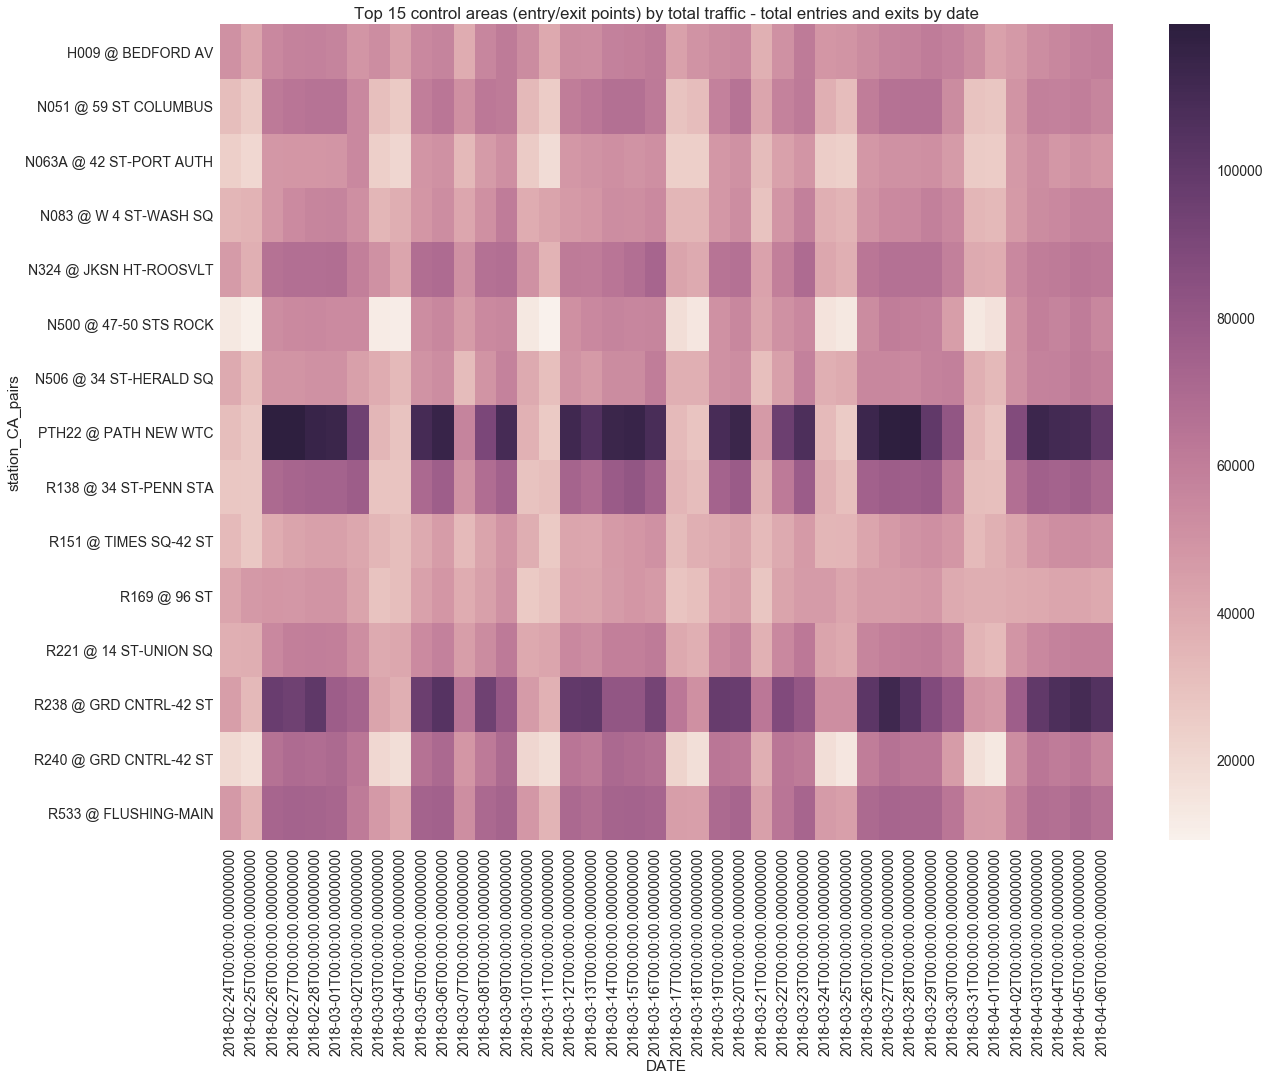

In [340]:
savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Top 15 control areas (entry/exit points) by total traffic - total entries and exits by date"
ca_traffic_top_15_by_date = ca_traffic_top_15_by_date[np.isfinite(ca_traffic_top_15_by_date['total_traffic'])].copy()
df = ca_traffic_top_15_by_date.pivot_table(index='station_CA_pairs', columns='DATE', values='total_traffic')
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=False)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'.pdf', bbox_inches="tight")

#plt.savefig(savepath+'test.pdf')
#fig = plt.figure()
#plt.plot(data)
#fig.suptitle('test title', fontsize=20)
#plt.xlabel('xlabel', fontsize=18)
#plt.ylabel('ylabel', fontsize=16)
#fig.savefig('test.jpg')

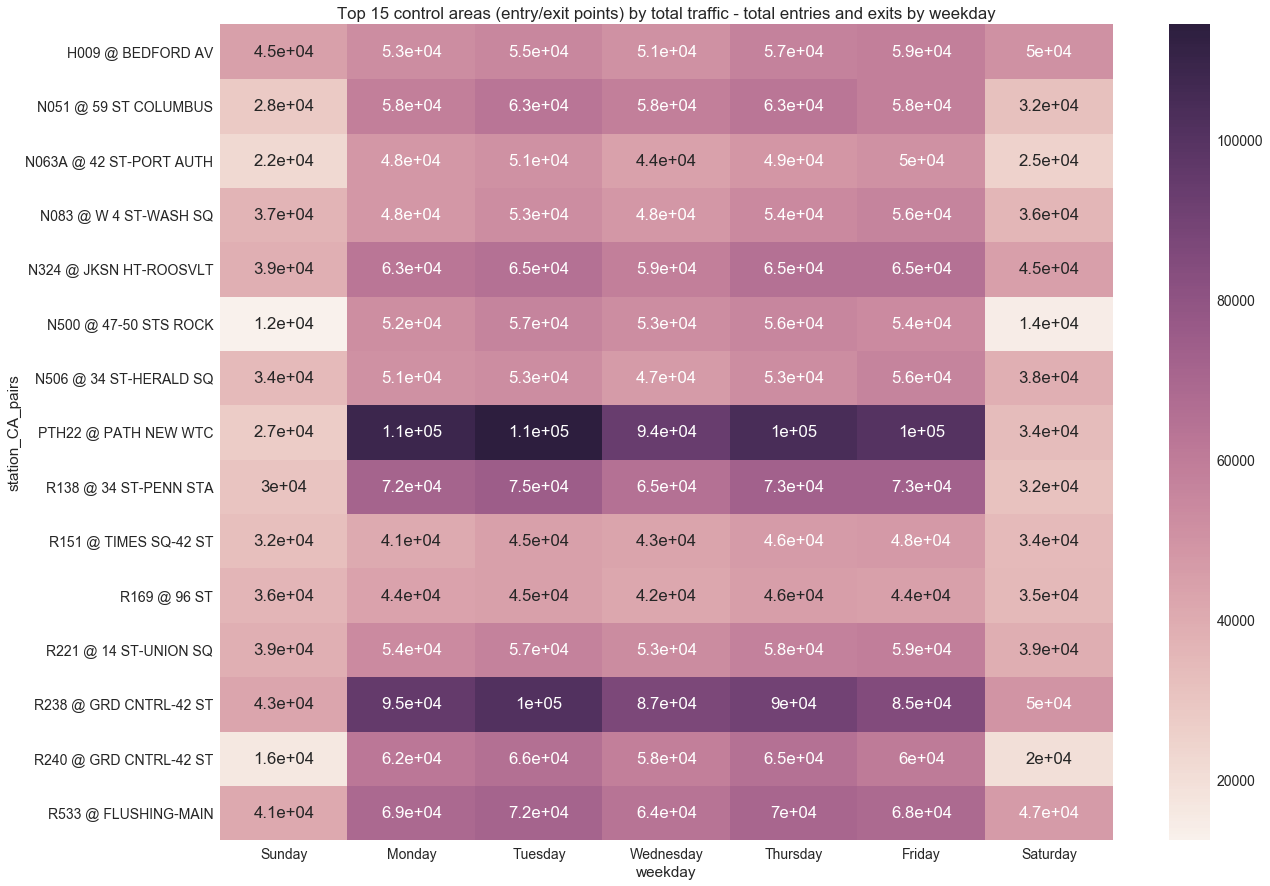

In [339]:
savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Top 15 control areas (entry/exit points) by total traffic - total entries and exits by weekday"
ca_traffic_top_15_by_date = ca_traffic_top_15_by_date[np.isfinite(ca_traffic_top_15_by_date['total_traffic'])].copy()
ca_traffic_top_15_by_date['DATE'] = pd.to_datetime(ca_traffic_top_15_by_date['DATE'])
ca_traffic_top_15_by_date['weekday']=ca_traffic_top_15_by_date['DATE'].dt.weekday_name

df = ca_traffic_top_15_by_date.pivot_table(index='station_CA_pairs', columns='weekday', values='total_traffic')
cols = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday']
df = df[cols]

sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'.pdf', bbox_inches="tight")

In [253]:
df_mta['weekday']=df_mta['datetime'].dt.weekday_name

In [254]:
df_mta.head()

,index,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,...,datetime_str,datetime,turnstile,time_delta,entries_last,entries_delta,exits_delta,entries_pm,total_traffic,weekday
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,...,03/31/2018 04:00:00,2018-03-31 04:00:00,A002 02-00-00,04:00:00,6566463.0,7.0,3.0,0.029167,10.0,Saturday
14,14,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,08:00:00,REGULAR,...,04/02/2018 08:00:00,2018-04-02 08:00:00,A002 02-00-00,04:00:00,6566470.0,25.0,87.0,0.104167,112.0,Monday
15,15,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,12:00:00,REGULAR,...,04/02/2018 12:00:00,2018-04-02 12:00:00,A002 02-00-00,04:00:00,6566495.0,134.0,208.0,0.558333,342.0,Monday
16,16,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,16:00:00,REGULAR,...,04/02/2018 16:00:00,2018-04-02 16:00:00,A002 02-00-00,04:00:00,6566629.0,210.0,56.0,0.875000,266.0,Monday
17,17,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/02/2018,20:00:00,REGULAR,...,04/02/2018 20:00:00,2018-04-02 20:00:00,A002 02-00-00,04:00:00,6566839.0,630.0,66.0,2.625000,696.0,Monday


In [261]:
ca_traffic_top_15_by_date.head(5)

,station_CA_pairs,DATE,index,ENTRIES,EXITS,entries_last,entries_delta,exits_delta,entries_pm,total_traffic,weekday
0,PTH22 @ PATH NEW WTC,2018-03-28,28668347,34126885,34572137,34064630.0,62255.0,57482.0,242.455665,119737.0,Wednesday
1,PTH22 @ PATH NEW WTC,2018-02-27,28120552,31308600,28782508,31248786.0,59814.0,59125.0,237.370112,118939.0,Tuesday
2,PTH22 @ PATH NEW WTC,2018-03-27,29149415,34258871,35140645,34196394.0,62477.0,56446.0,248.048135,118923.0,Tuesday
3,PTH22 @ PATH NEW WTC,2018-02-26,28607879,30961786,28473991,30902912.0,58874.0,60041.0,233.626984,118915.0,Monday
4,PTH22 @ PATH NEW WTC,2018-03-15,28926923,36282163,33348930,36221031.0,61132.0,54266.0,242.275833,115398.0,Thursday


In [263]:
station_traffic_by_date=df_mta.groupby(['STATION', 'DATE']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()
station_traffic_by_date.head(5)

,STATION,DATE,index,ENTRIES,EXITS,entries_last,entries_delta,exits_delta,entries_pm,total_traffic
0,34 ST-PENN STA,03/15/2018,45988918,20875871563,17496135251,2.087569e+10,182192.0,153083.0,754.264583,335275.0
1,34 ST-PENN STA,03/29/2018,45995659,20744523390,17445549872,2.074434e+10,180004.0,153545.0,750.016667,333549.0
2,34 ST-PENN STA,04/05/2018,46822671,20997546680,17516276899,2.099737e+10,175714.0,151079.0,739.147367,326793.0
3,34 ST-PENN STA,03/28/2018,46149969,20961645395,17443277460,2.096147e+10,177101.0,148173.0,737.377083,325274.0
4,34 ST-PENN STA,03/06/2018,47512372,21969498952,18894280404,2.196932e+10,176653.0,148079.0,796.557515,324732.0


In [270]:
# get a list of top 15 most trafficked stations summing across all dates

station_traffic_sum=df_mta.groupby(['STATION']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()
station_traffic_sum_top_15 = station_traffic_sum.head(15).copy()
station_traffic_sum_top_15_list = station_traffic_sum_top_15.STATION.unique()
print(station_traffic_sum_top_15_list)

['34 ST-PENN STA' 'GRD CNTRL-42 ST' '34 ST-HERALD SQ' '14 ST-UNION SQ'
 '23 ST' 'TIMES SQ-42 ST' 'FULTON ST' '42 ST-PORT AUTH' '86 ST' '125 ST'
 '59 ST COLUMBUS' 'CANAL ST' '59 ST' '96 ST' '47-50 STS ROCK']


In [272]:
# get the traffic data by date for the top 15 stations

station_traffic_by_date_top_15 = station_traffic_by_date[station_traffic_by_date['STATION'].isin(station_traffic_sum_top_15_list)].copy()
station_traffic_by_date_top_15.head(5)

,STATION,DATE,index,ENTRIES,EXITS,entries_last,entries_delta,exits_delta,entries_pm,total_traffic
0,34 ST-PENN STA,03/15/2018,45988918,20875871563,17496135251,2.087569e+10,182192.0,153083.0,754.264583,335275.0
1,34 ST-PENN STA,03/29/2018,45995659,20744523390,17445549872,2.074434e+10,180004.0,153545.0,750.016667,333549.0
2,34 ST-PENN STA,04/05/2018,46822671,20997546680,17516276899,2.099737e+10,175714.0,151079.0,739.147367,326793.0
3,34 ST-PENN STA,03/28/2018,46149969,20961645395,17443277460,2.096147e+10,177101.0,148173.0,737.377083,325274.0
4,34 ST-PENN STA,03/06/2018,47512372,21969498952,18894280404,2.196932e+10,176653.0,148079.0,796.557515,324732.0


In [274]:
# drop any remaining NaNs

station_traffic_by_date_top_15 = station_traffic_by_date_top_15[np.isfinite(station_traffic_by_date_top_15['total_traffic'])].copy()

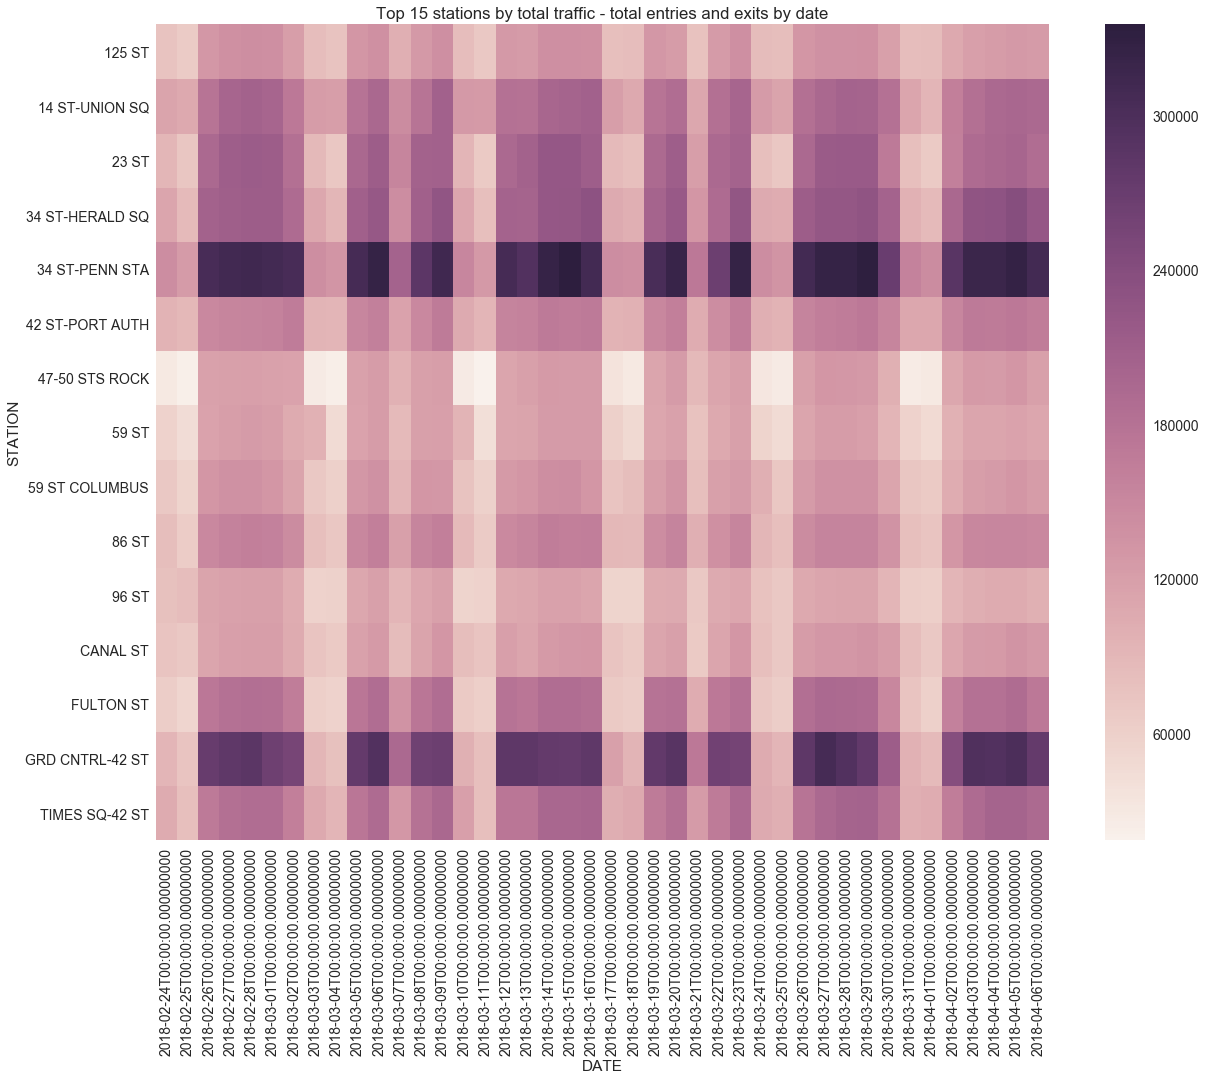

In [414]:
savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Top 15 stations by total traffic - total entries and exits by date"
df = station_traffic_by_date_top_15.pivot_table(index='STATION', columns='DATE', values='total_traffic')
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=False)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'.pdf', bbox_inches="tight")
plt.savefig(fullpath+'.png', bbox_inches="tight")

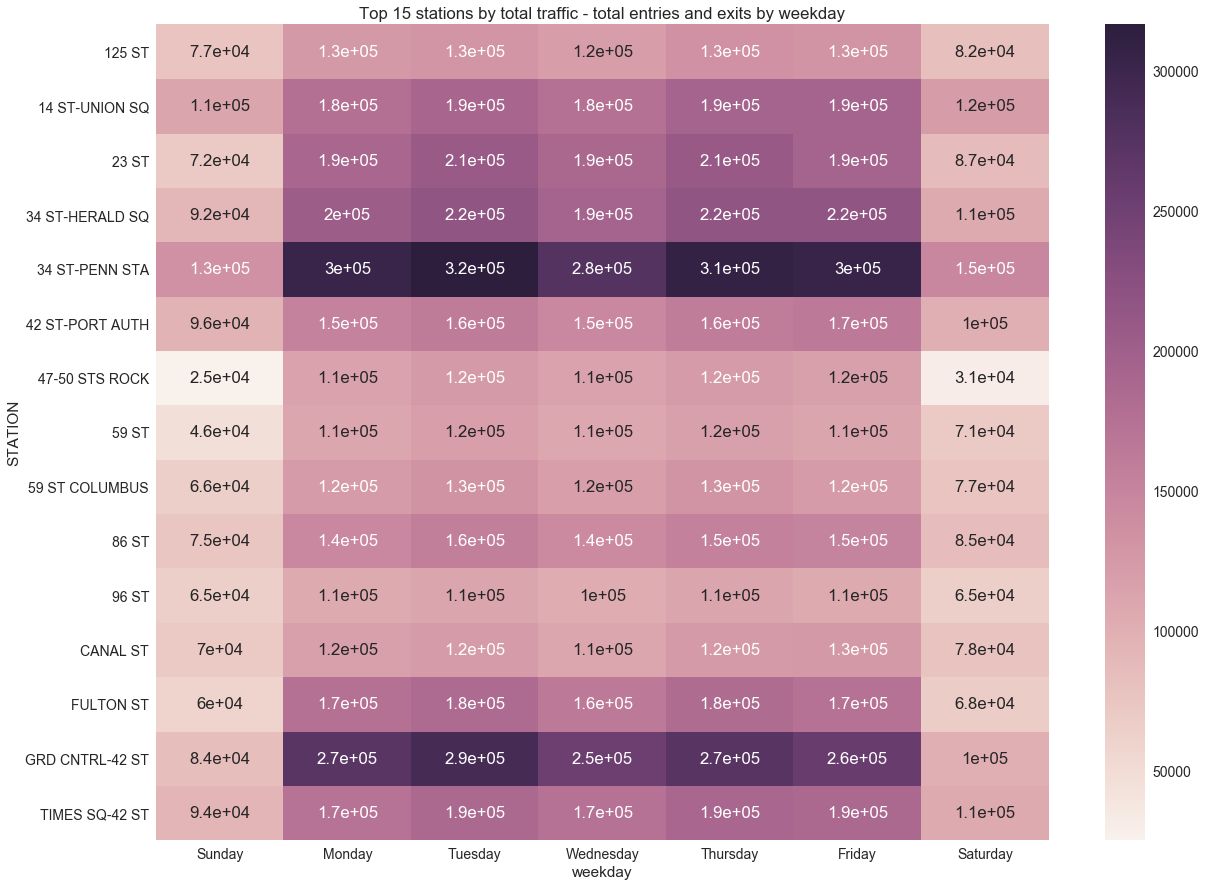

In [415]:
station_traffic_by_date_top_15 = station_traffic_by_date_top_15[np.isfinite(station_traffic_by_date_top_15['total_traffic'])].copy()
station_traffic_by_date_top_15['DATE'] = pd.to_datetime(station_traffic_by_date_top_15['DATE'])
station_traffic_by_date_top_15['weekday']=station_traffic_by_date_top_15['DATE'].dt.weekday_name

df = station_traffic_by_date_top_15.pivot_table(index='STATION', columns='weekday', values='total_traffic')
cols = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday']
df = df[cols]

savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Top 15 stations by total traffic - total entries and exits by weekday"
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'.pdf', bbox_inches="tight")
plt.savefig(fullpath+'.png', bbox_inches="tight")

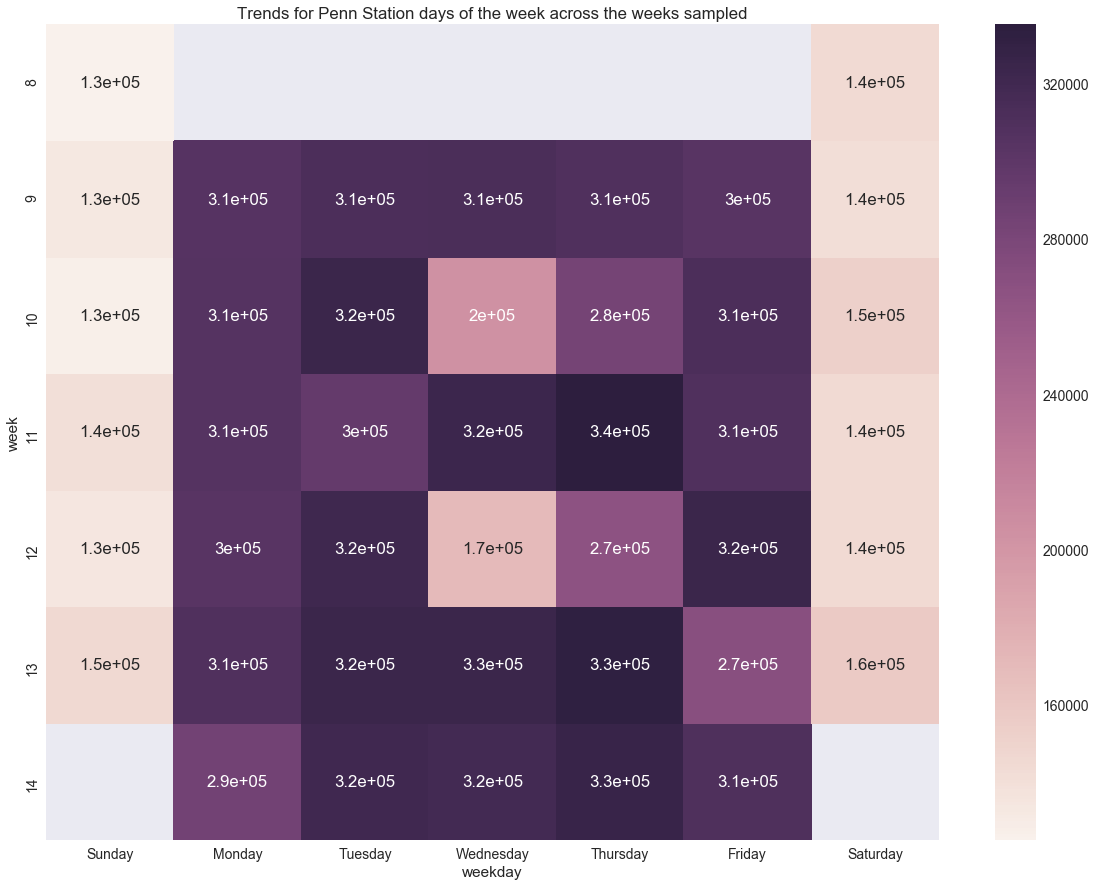

In [416]:
station_traffic_by_date_Penn = station_traffic_by_date_top_15[station_traffic_by_date_top_15['STATION']=="34 ST-PENN STA"]
station_traffic_by_date_Penn = station_traffic_by_date_Penn[np.isfinite(station_traffic_by_date_Penn['total_traffic'])].copy()
station_traffic_by_date_Penn['DATE'] = pd.to_datetime(station_traffic_by_date_Penn['DATE'])
station_traffic_by_date_Penn['weekday']=station_traffic_by_date_Penn['DATE'].dt.weekday_name
station_traffic_by_date_Penn['week']=station_traffic_by_date_Penn['DATE'].dt.week

df = station_traffic_by_date_Penn.pivot_table(index='week', columns='weekday', values='total_traffic')
cols = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday']
df = df[cols]

savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Trends for Penn Station days of the week across the weeks sampled"
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'.pdf', bbox_inches="tight")
plt.savefig(fullpath+'.png', bbox_inches="tight")

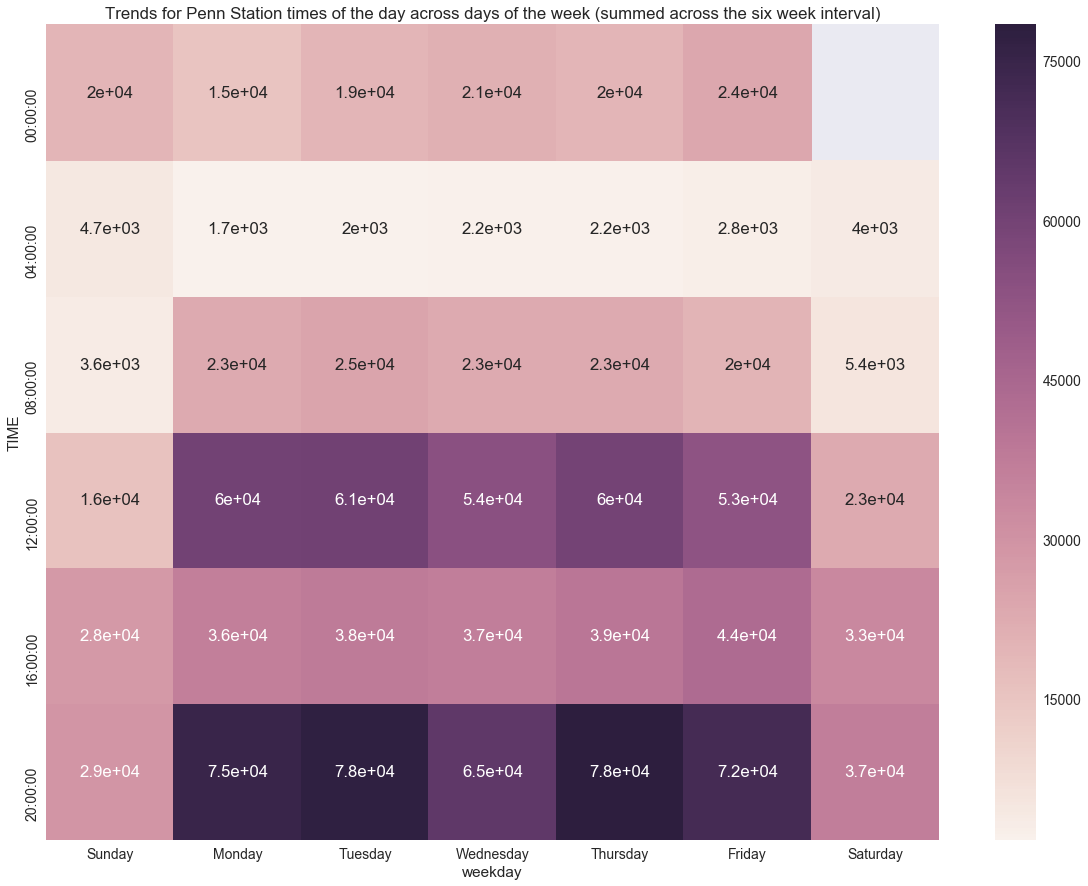

In [417]:
station_traffic_by_date_time=df_mta.groupby(['STATION','DATE','TIME']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()

station_traffic_by_date_and_time_Penn = station_traffic_by_date_time[station_traffic_by_date_time['STATION']=="34 ST-PENN STA"]
station_traffic_by_date_and_time_Penn = station_traffic_by_date_and_time_Penn[np.isfinite(station_traffic_by_date_and_time_Penn['total_traffic'])].copy()
station_traffic_by_date_and_time_Penn['DATE'] = pd.to_datetime(station_traffic_by_date_and_time_Penn['DATE'])
station_traffic_by_date_and_time_Penn['weekday']=station_traffic_by_date_and_time_Penn['DATE'].dt.weekday_name
station_traffic_by_date_and_time_Penn['week']=station_traffic_by_date_and_time_Penn['DATE'].dt.week

# replacing daylight savings time values

station_traffic_by_date_and_time_Penn['TIME'].replace(['23:00:00'], '00:00:00')
station_traffic_by_date_and_time_Penn['TIME'].replace(['03:00:00'], '04:00:00')
station_traffic_by_date_and_time_Penn['TIME'].replace(['07:00:00'], '08:00:00')
station_traffic_by_date_and_time_Penn['TIME'].replace(['11:00:00'], '12:00:00')
station_traffic_by_date_and_time_Penn['TIME'].replace(['15:00:00'], '16:00:00')
station_traffic_by_date_and_time_Penn['TIME'].replace(['19:00:00'], '20:00:00')

# keep only 4-hour interval values

timelist = ['00:00:00', '04:00:00', '08:00:00',
            '12:00:00', '16:00:00', '20:00:00']
station_traffic_by_date_and_time_Penn = station_traffic_by_date_and_time_Penn[station_traffic_by_date_and_time_Penn['TIME'].isin(timelist)]

# turn times into datetime values

station_traffic_by_date_and_time_Penn['TIME'] = station_traffic_by_date_and_time_Penn['TIME'].apply(pd.to_datetime)
station_traffic_by_date_and_time_Penn['TIME'] = station_traffic_by_date_and_time_Penn['TIME'].dt.time

# make a pivot table and manually assign weekday order

df = station_traffic_by_date_and_time_Penn.pivot_table(index='TIME', columns='weekday', values='total_traffic')
cols = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday']
df = df[cols]

savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Trends for Penn Station times of the day across days of the week (summed across the six week interval)"
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'.pdf', bbox_inches="tight")
plt.savefig(fullpath+'.png', bbox_inches="tight")

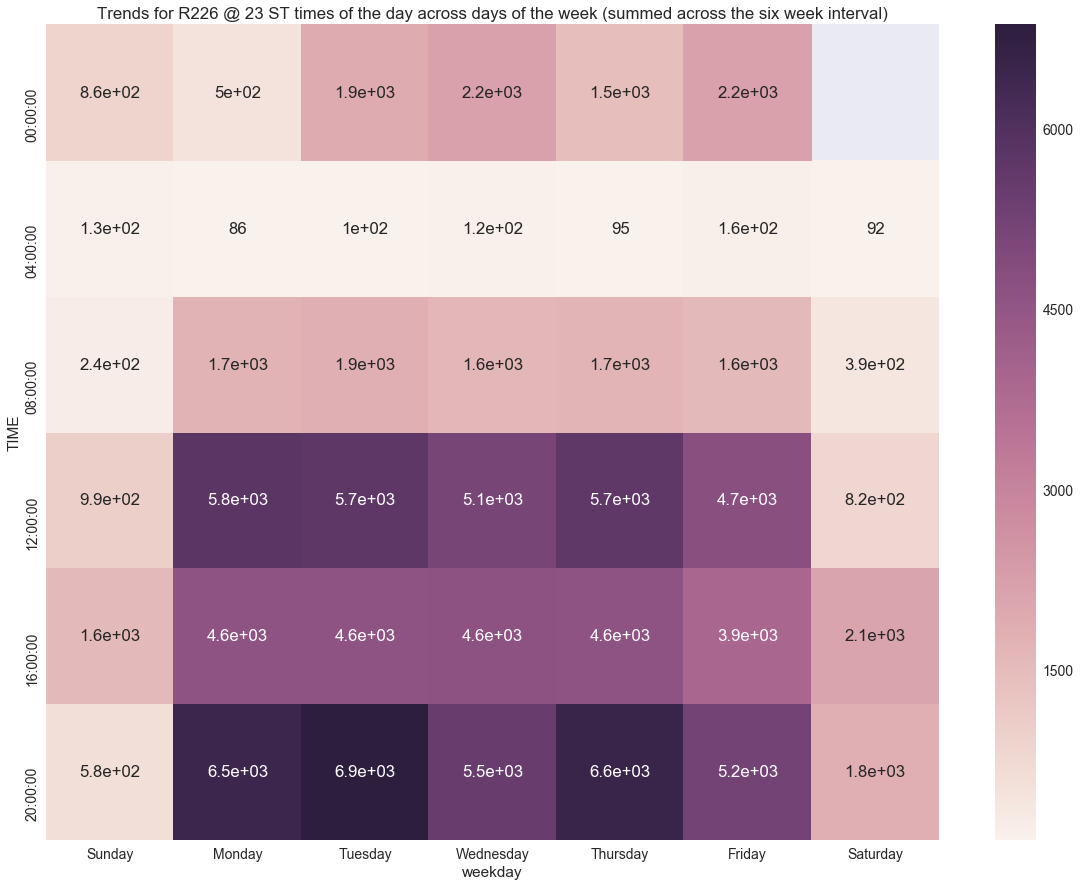

In [418]:
df_mta["station_CA_pairs"] = df_mta["CA"] + " @ " + df_mta["STATION"]

station_ca_traffic_by_date_time=df_mta.groupby(['station_CA_pairs','DATE','TIME']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()

specific_station_ca_pair = 'R226 @ 23 ST'

specific_station_ca_pair_traffic_by_date_and_time = station_ca_traffic_by_date_time[station_ca_traffic_by_date_time['station_CA_pairs']==specific_station_ca_pair]
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[np.isfinite(specific_station_ca_pair_traffic_by_date_and_time['total_traffic'])].copy()
specific_station_ca_pair_traffic_by_date_and_time['DATE'] = pd.to_datetime(specific_station_ca_pair_traffic_by_date_and_time['DATE'])
specific_station_ca_pair_traffic_by_date_and_time['weekday']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.weekday_name
specific_station_ca_pair_traffic_by_date_and_time['week']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.week

# replacing daylight savings time values

specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['23:00:00'], '00:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['03:00:00'], '04:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['07:00:00'], '08:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['11:00:00'], '12:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['15:00:00'], '16:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['19:00:00'], '20:00:00')

# keep only 4-hour interval values

timelist = ['00:00:00', '04:00:00', '08:00:00',
            '12:00:00', '16:00:00', '20:00:00']
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[specific_station_ca_pair_traffic_by_date_and_time['TIME'].isin(timelist)]

# turn times into datetime values

specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].apply(pd.to_datetime)
specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].dt.time

# make a pivot table and manually assign weekday order

df = specific_station_ca_pair_traffic_by_date_and_time.pivot_table(index='TIME', columns='weekday', values='total_traffic')
cols = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday']
df = df[cols]

savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Trends for " + specific_station_ca_pair + " times of the day across days of the week (summed across the six week interval)"
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'.pdf', bbox_inches="tight")
plt.savefig(fullpath+'.png', bbox_inches="tight")

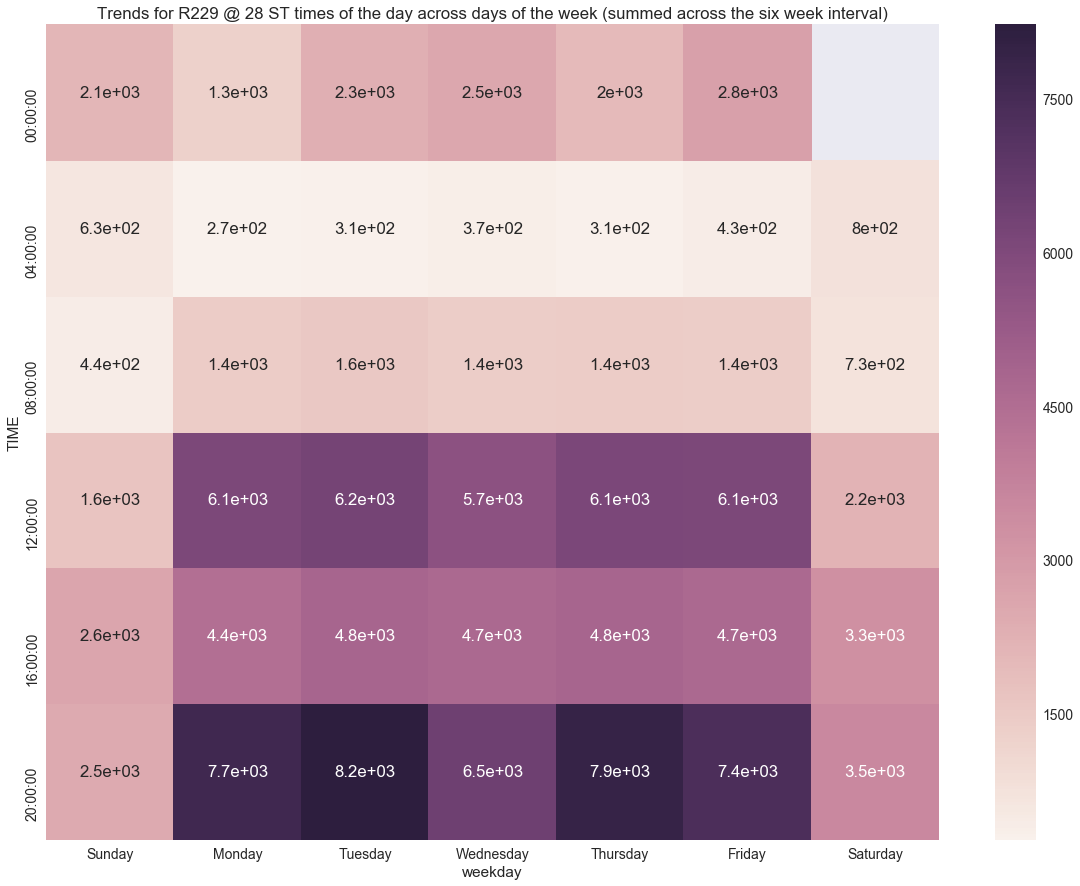

In [419]:
df_mta["station_CA_pairs"] = df_mta["CA"] + " @ " + df_mta["STATION"]

station_ca_traffic_by_date_time=df_mta.groupby(['station_CA_pairs','DATE','TIME']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()

specific_station_ca_pair = 'R229 @ 28 ST'

specific_station_ca_pair_traffic_by_date_and_time = station_ca_traffic_by_date_time[station_ca_traffic_by_date_time['station_CA_pairs']==specific_station_ca_pair]
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[np.isfinite(specific_station_ca_pair_traffic_by_date_and_time['total_traffic'])].copy()
specific_station_ca_pair_traffic_by_date_and_time['DATE'] = pd.to_datetime(specific_station_ca_pair_traffic_by_date_and_time['DATE'])
specific_station_ca_pair_traffic_by_date_and_time['weekday']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.weekday_name
specific_station_ca_pair_traffic_by_date_and_time['week']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.week

# replacing daylight savings time values

specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['23:00:00'], '00:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['03:00:00'], '04:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['07:00:00'], '08:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['11:00:00'], '12:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['15:00:00'], '16:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['19:00:00'], '20:00:00')

# keep only 4-hour interval values

timelist = ['00:00:00', '04:00:00', '08:00:00',
            '12:00:00', '16:00:00', '20:00:00']
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[specific_station_ca_pair_traffic_by_date_and_time['TIME'].isin(timelist)]

# turn times into datetime values

specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].apply(pd.to_datetime)
specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].dt.time

# make a pivot table and manually assign weekday order

df = specific_station_ca_pair_traffic_by_date_and_time.pivot_table(index='TIME', columns='weekday', values='total_traffic')
cols = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday']
df = df[cols]

savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Trends for " + specific_station_ca_pair + " times of the day across days of the week (summed across the six week interval)"
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'.pdf', bbox_inches="tight")
plt.savefig(fullpath+'.png', bbox_inches="tight")

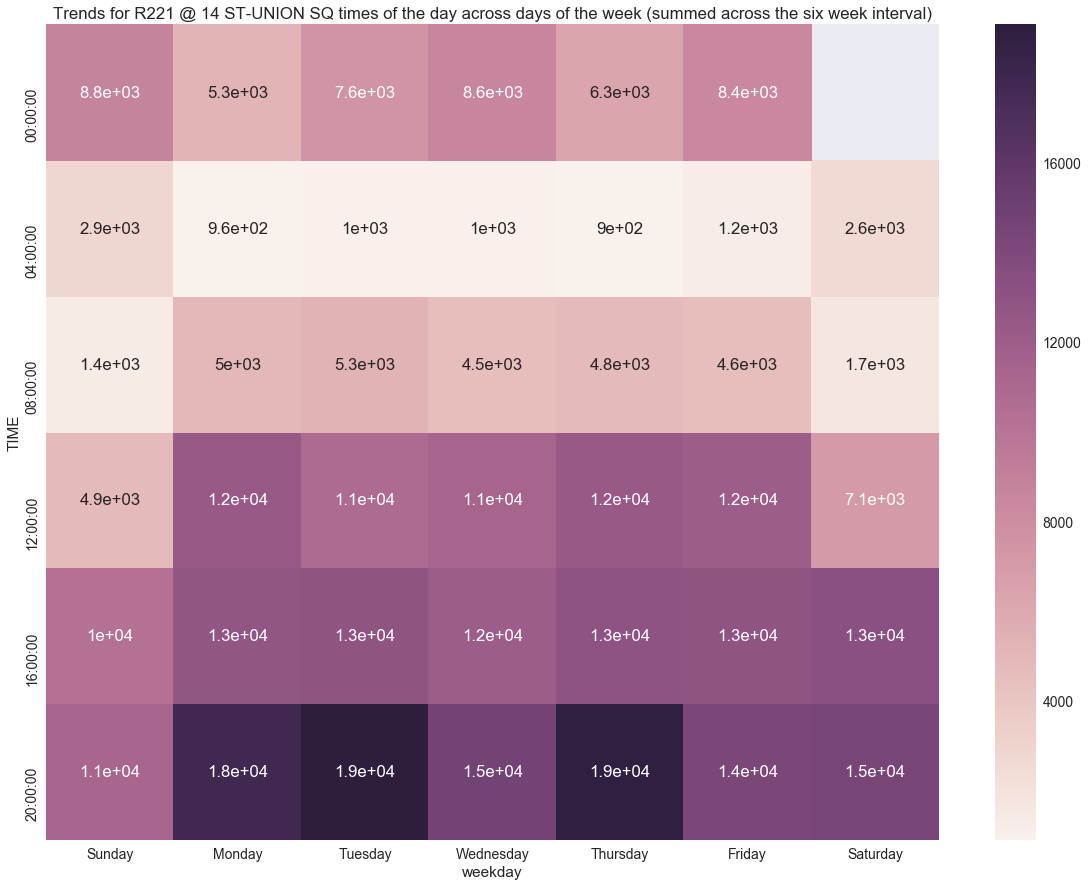

In [420]:
df_mta["station_CA_pairs"] = df_mta["CA"] + " @ " + df_mta["STATION"]

station_ca_traffic_by_date_time=df_mta.groupby(['station_CA_pairs','DATE','TIME']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()

specific_station_ca_pair = 'R221 @ 14 ST-UNION SQ'

specific_station_ca_pair_traffic_by_date_and_time = station_ca_traffic_by_date_time[station_ca_traffic_by_date_time['station_CA_pairs']==specific_station_ca_pair]
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[np.isfinite(specific_station_ca_pair_traffic_by_date_and_time['total_traffic'])].copy()
specific_station_ca_pair_traffic_by_date_and_time['DATE'] = pd.to_datetime(specific_station_ca_pair_traffic_by_date_and_time['DATE'])
specific_station_ca_pair_traffic_by_date_and_time['weekday']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.weekday_name
specific_station_ca_pair_traffic_by_date_and_time['week']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.week

# replacing daylight savings time values

specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['23:00:00'], '00:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['03:00:00'], '04:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['07:00:00'], '08:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['11:00:00'], '12:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['15:00:00'], '16:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['19:00:00'], '20:00:00')

# keep only 4-hour interval values

timelist = ['00:00:00', '04:00:00', '08:00:00',
            '12:00:00', '16:00:00', '20:00:00']
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[specific_station_ca_pair_traffic_by_date_and_time['TIME'].isin(timelist)]

# turn times into datetime values

specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].apply(pd.to_datetime)
specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].dt.time

# make a pivot table and manually assign weekday order

df = specific_station_ca_pair_traffic_by_date_and_time.pivot_table(index='TIME', columns='weekday', values='total_traffic')
cols = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday']
df = df[cols]

savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Trends for " + specific_station_ca_pair + " times of the day across days of the week (summed across the six week interval)"
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'.pdf', bbox_inches="tight")
plt.savefig(fullpath+'.png', bbox_inches="tight")

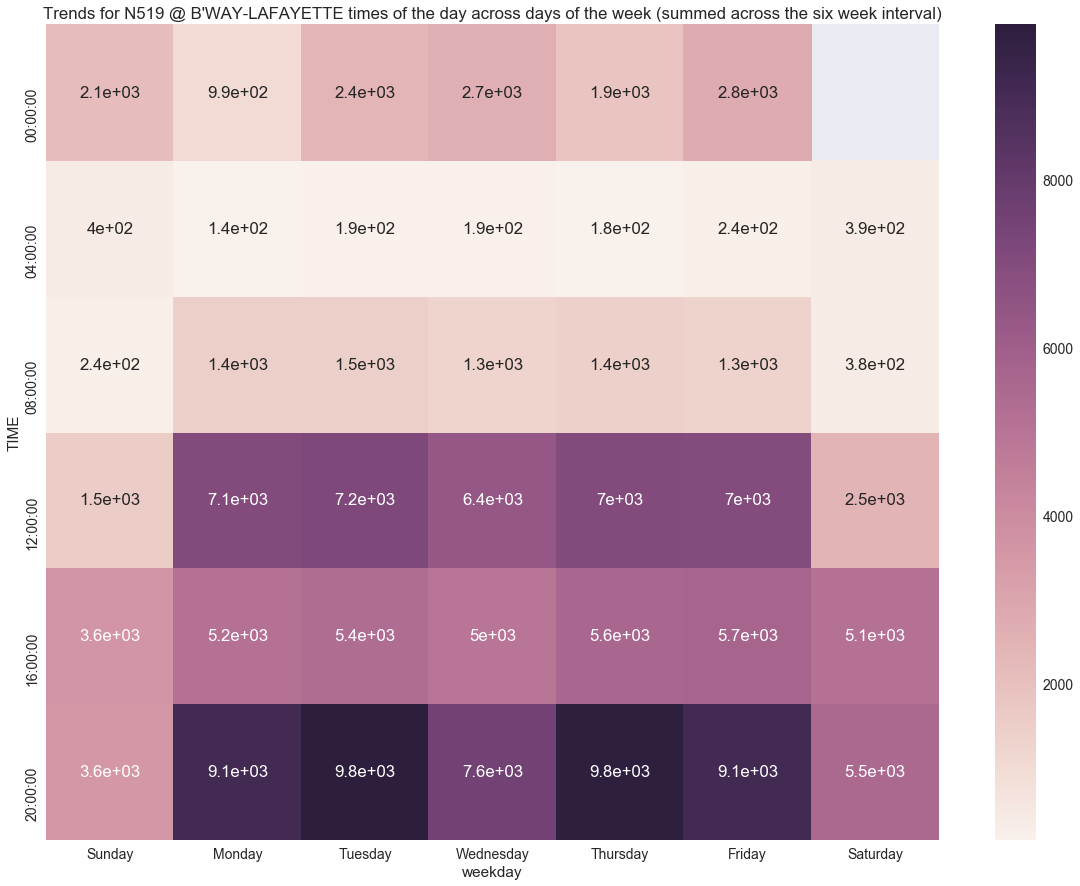

In [421]:
df_mta["station_CA_pairs"] = df_mta["CA"] + " @ " + df_mta["STATION"]

station_ca_traffic_by_date_time=df_mta.groupby(['station_CA_pairs','DATE','TIME']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()

specific_station_ca_pair = "N519 @ B'WAY-LAFAYETTE"

specific_station_ca_pair_traffic_by_date_and_time = station_ca_traffic_by_date_time[station_ca_traffic_by_date_time['station_CA_pairs']==specific_station_ca_pair]
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[np.isfinite(specific_station_ca_pair_traffic_by_date_and_time['total_traffic'])].copy()
specific_station_ca_pair_traffic_by_date_and_time['DATE'] = pd.to_datetime(specific_station_ca_pair_traffic_by_date_and_time['DATE'])
specific_station_ca_pair_traffic_by_date_and_time['weekday']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.weekday_name
specific_station_ca_pair_traffic_by_date_and_time['week']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.week

# replacing daylight savings time values

specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['23:00:00'], '00:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['03:00:00'], '04:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['07:00:00'], '08:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['11:00:00'], '12:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['15:00:00'], '16:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['19:00:00'], '20:00:00')

# keep only 4-hour interval values

timelist = ['00:00:00', '04:00:00', '08:00:00',
            '12:00:00', '16:00:00', '20:00:00']
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[specific_station_ca_pair_traffic_by_date_and_time['TIME'].isin(timelist)]

# turn times into datetime values

specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].apply(pd.to_datetime)
specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].dt.time

# make a pivot table and manually assign weekday order

df = specific_station_ca_pair_traffic_by_date_and_time.pivot_table(index='TIME', columns='weekday', values='total_traffic')
cols = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday']
df = df[cols]

savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Trends for " + specific_station_ca_pair + " times of the day across days of the week (summed across the six week interval)"
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'.pdf', bbox_inches="tight")
plt.savefig(fullpath+'.png', bbox_inches="tight")

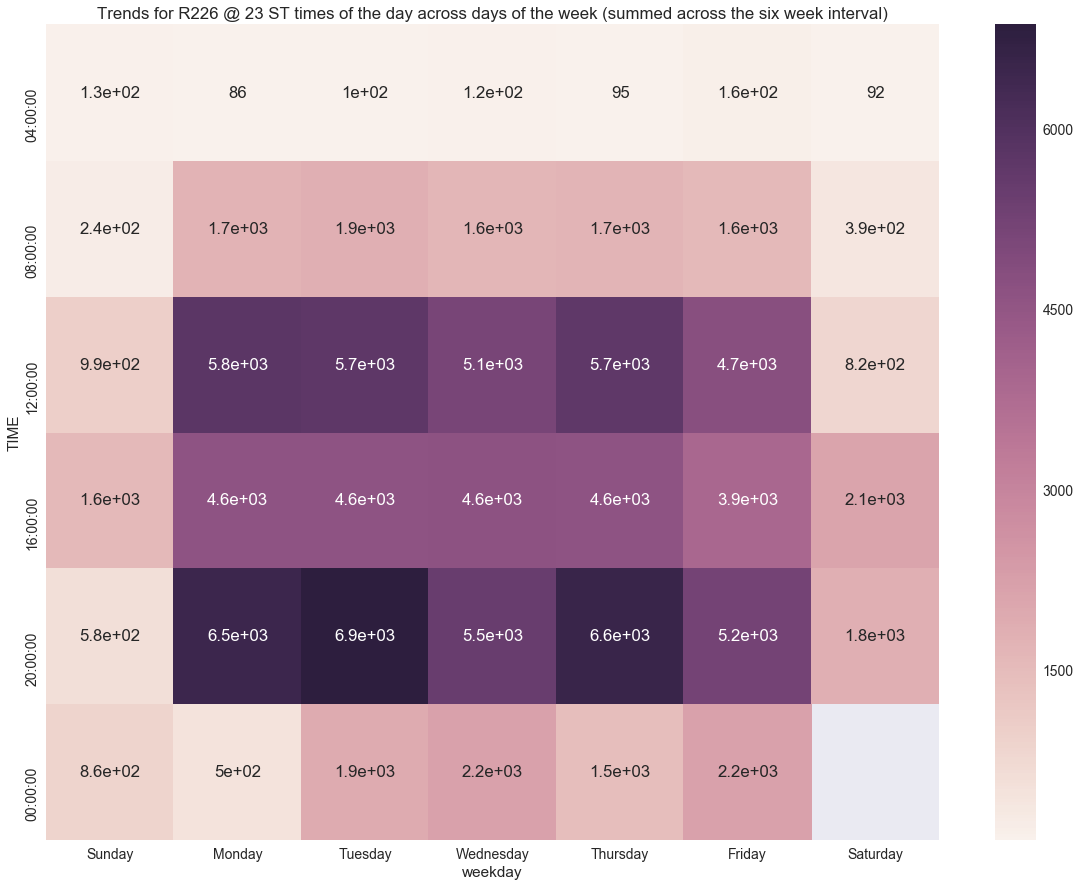

In [422]:
df_mta["station_CA_pairs"] = df_mta["CA"] + " @ " + df_mta["STATION"]

station_ca_traffic_by_date_time=df_mta.groupby(['station_CA_pairs','DATE','TIME']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()

specific_station_ca_pair = 'R226 @ 23 ST'

# can exclude these weeks due to snow-storm
# 3/21 - 3/18-3/24
# 3/7 - 3/4-3/10

specific_station_ca_pair_traffic_by_date_and_time = station_ca_traffic_by_date_time[station_ca_traffic_by_date_time['station_CA_pairs']==specific_station_ca_pair]
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[np.isfinite(specific_station_ca_pair_traffic_by_date_and_time['total_traffic'])].copy()
specific_station_ca_pair_traffic_by_date_and_time['DATE'] = pd.to_datetime(specific_station_ca_pair_traffic_by_date_and_time['DATE'])
specific_station_ca_pair_traffic_by_date_and_time['weekday']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.weekday_name
specific_station_ca_pair_traffic_by_date_and_time['week']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.week

# replacing daylight savings time values

specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['23:00:00'], '00:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['03:00:00'], '04:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['07:00:00'], '08:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['11:00:00'], '12:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['15:00:00'], '16:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['19:00:00'], '20:00:00')

# keep only 4-hour interval values

timelist = ['00:00:00', '04:00:00', '08:00:00',
            '12:00:00', '16:00:00', '20:00:00']
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[specific_station_ca_pair_traffic_by_date_and_time['TIME'].isin(timelist)]

# turn times into datetime values

specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].apply(pd.to_datetime)
specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].dt.time

# make a pivot table and manually assign weekday order

df = specific_station_ca_pair_traffic_by_date_and_time.pivot_table(index='TIME', columns='weekday', values='total_traffic')
cols = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday']
df.index = pd.CategoricalIndex(df.index, categories= [datetime.strptime('04:00:00', '%H:%M:%S').time(), datetime.strptime('08:00:00', '%H:%M:%S').time(),datetime.strptime('12:00:00', '%H:%M:%S').time(), datetime.strptime('16:00:00', '%H:%M:%S').time(), datetime.strptime('20:00:00', '%H:%M:%S').time(), datetime.strptime('00:00:00', '%H:%M:%S').time()])
df.sort_index(level=0, inplace=True)
df = df[cols]

savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Trends for " + specific_station_ca_pair + " times of the day across days of the week (summed across the six week interval)"
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'reordered_times.pdf', bbox_inches="tight")
plt.savefig(fullpath+'.png', bbox_inches="tight")

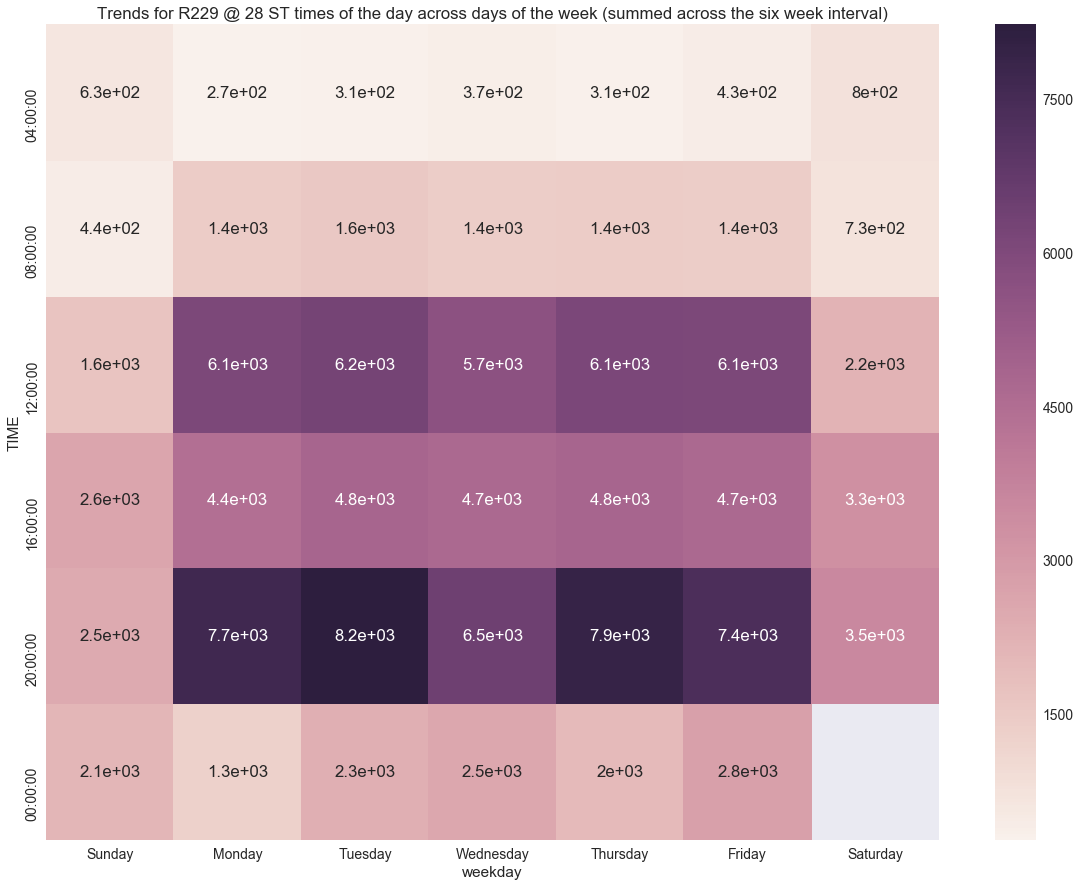

In [423]:
df_mta["station_CA_pairs"] = df_mta["CA"] + " @ " + df_mta["STATION"]

station_ca_traffic_by_date_time=df_mta.groupby(['station_CA_pairs','DATE','TIME']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()

specific_station_ca_pair = 'R229 @ 28 ST'

# can exclude these weeks due to snow-storm
# 3/21 - 3/18-3/24
# 3/7 - 3/4-3/10

specific_station_ca_pair_traffic_by_date_and_time = station_ca_traffic_by_date_time[station_ca_traffic_by_date_time['station_CA_pairs']==specific_station_ca_pair]
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[np.isfinite(specific_station_ca_pair_traffic_by_date_and_time['total_traffic'])].copy()
specific_station_ca_pair_traffic_by_date_and_time['DATE'] = pd.to_datetime(specific_station_ca_pair_traffic_by_date_and_time['DATE'])
specific_station_ca_pair_traffic_by_date_and_time['weekday']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.weekday_name
specific_station_ca_pair_traffic_by_date_and_time['week']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.week

# replacing daylight savings time values

specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['23:00:00'], '00:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['03:00:00'], '04:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['07:00:00'], '08:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['11:00:00'], '12:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['15:00:00'], '16:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['19:00:00'], '20:00:00')

# keep only 4-hour interval values

timelist = ['00:00:00', '04:00:00', '08:00:00',
            '12:00:00', '16:00:00', '20:00:00']
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[specific_station_ca_pair_traffic_by_date_and_time['TIME'].isin(timelist)]

# turn times into datetime values

specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].apply(pd.to_datetime)
specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].dt.time

# make a pivot table and manually assign weekday order

df = specific_station_ca_pair_traffic_by_date_and_time.pivot_table(index='TIME', columns='weekday', values='total_traffic')
cols = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday']
df.index = pd.CategoricalIndex(df.index, categories= [datetime.strptime('04:00:00', '%H:%M:%S').time(), datetime.strptime('08:00:00', '%H:%M:%S').time(),datetime.strptime('12:00:00', '%H:%M:%S').time(), datetime.strptime('16:00:00', '%H:%M:%S').time(), datetime.strptime('20:00:00', '%H:%M:%S').time(), datetime.strptime('00:00:00', '%H:%M:%S').time()])
df.sort_index(level=0, inplace=True)
df = df[cols]

savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Trends for " + specific_station_ca_pair + " times of the day across days of the week (summed across the six week interval)"
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'reordered_times.pdf', bbox_inches="tight")
plt.savefig(fullpath+'.png', bbox_inches="tight")

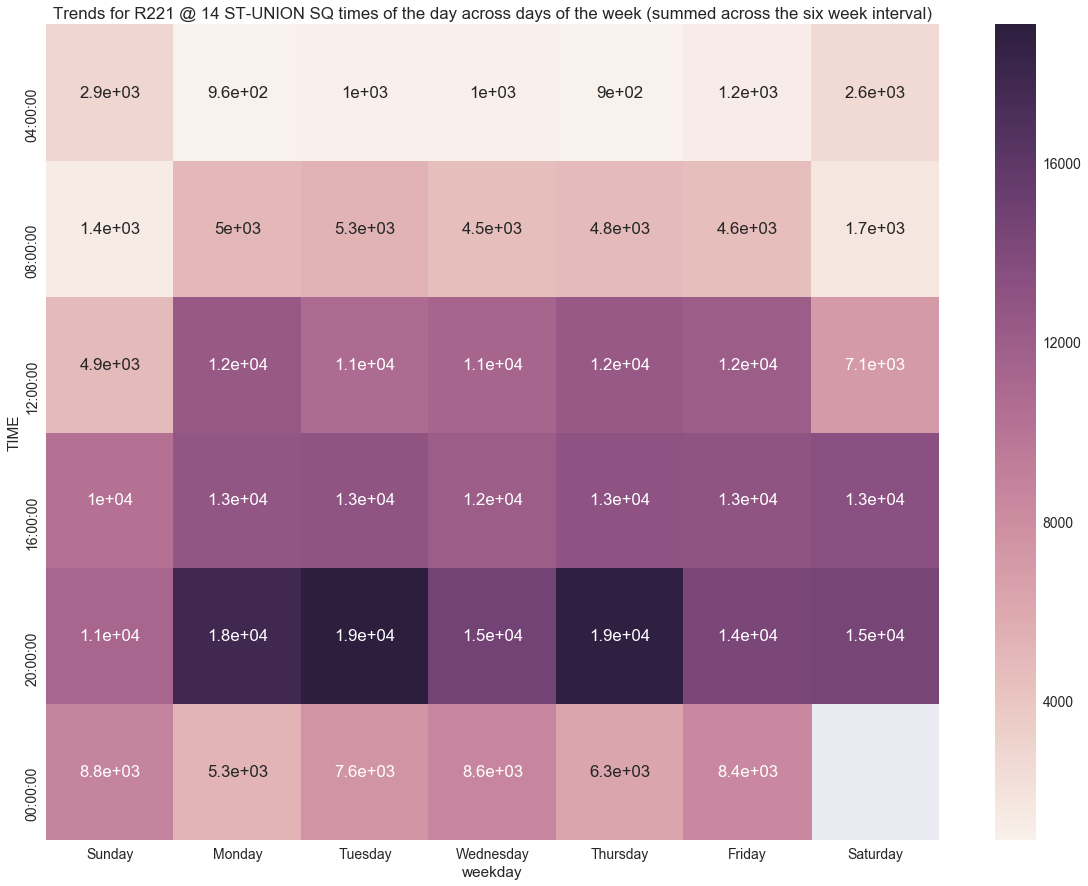

In [424]:
df_mta["station_CA_pairs"] = df_mta["CA"] + " @ " + df_mta["STATION"]

station_ca_traffic_by_date_time=df_mta.groupby(['station_CA_pairs','DATE','TIME']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()

specific_station_ca_pair = 'R221 @ 14 ST-UNION SQ'

# can exclude these weeks due to snow-storm
# 3/21 - 3/18-3/24
# 3/7 - 3/4-3/10

specific_station_ca_pair_traffic_by_date_and_time = station_ca_traffic_by_date_time[station_ca_traffic_by_date_time['station_CA_pairs']==specific_station_ca_pair]
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[np.isfinite(specific_station_ca_pair_traffic_by_date_and_time['total_traffic'])].copy()
specific_station_ca_pair_traffic_by_date_and_time['DATE'] = pd.to_datetime(specific_station_ca_pair_traffic_by_date_and_time['DATE'])
specific_station_ca_pair_traffic_by_date_and_time['weekday']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.weekday_name
specific_station_ca_pair_traffic_by_date_and_time['week']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.week

# replacing daylight savings time values

specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['23:00:00'], '00:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['03:00:00'], '04:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['07:00:00'], '08:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['11:00:00'], '12:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['15:00:00'], '16:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['19:00:00'], '20:00:00')

# keep only 4-hour interval values

timelist = ['00:00:00', '04:00:00', '08:00:00',
            '12:00:00', '16:00:00', '20:00:00']
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[specific_station_ca_pair_traffic_by_date_and_time['TIME'].isin(timelist)]

# turn times into datetime values

specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].apply(pd.to_datetime)
specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].dt.time

# make a pivot table and manually assign weekday order

df = specific_station_ca_pair_traffic_by_date_and_time.pivot_table(index='TIME', columns='weekday', values='total_traffic')
cols = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday']
df.index = pd.CategoricalIndex(df.index, categories= [datetime.strptime('04:00:00', '%H:%M:%S').time(), datetime.strptime('08:00:00', '%H:%M:%S').time(),datetime.strptime('12:00:00', '%H:%M:%S').time(), datetime.strptime('16:00:00', '%H:%M:%S').time(), datetime.strptime('20:00:00', '%H:%M:%S').time(), datetime.strptime('00:00:00', '%H:%M:%S').time()])
df.sort_index(level=0, inplace=True)
df = df[cols]

savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Trends for " + specific_station_ca_pair + " times of the day across days of the week (summed across the six week interval)"
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'reordered_times.pdf', bbox_inches="tight")
plt.savefig(fullpath+'.png', bbox_inches="tight")

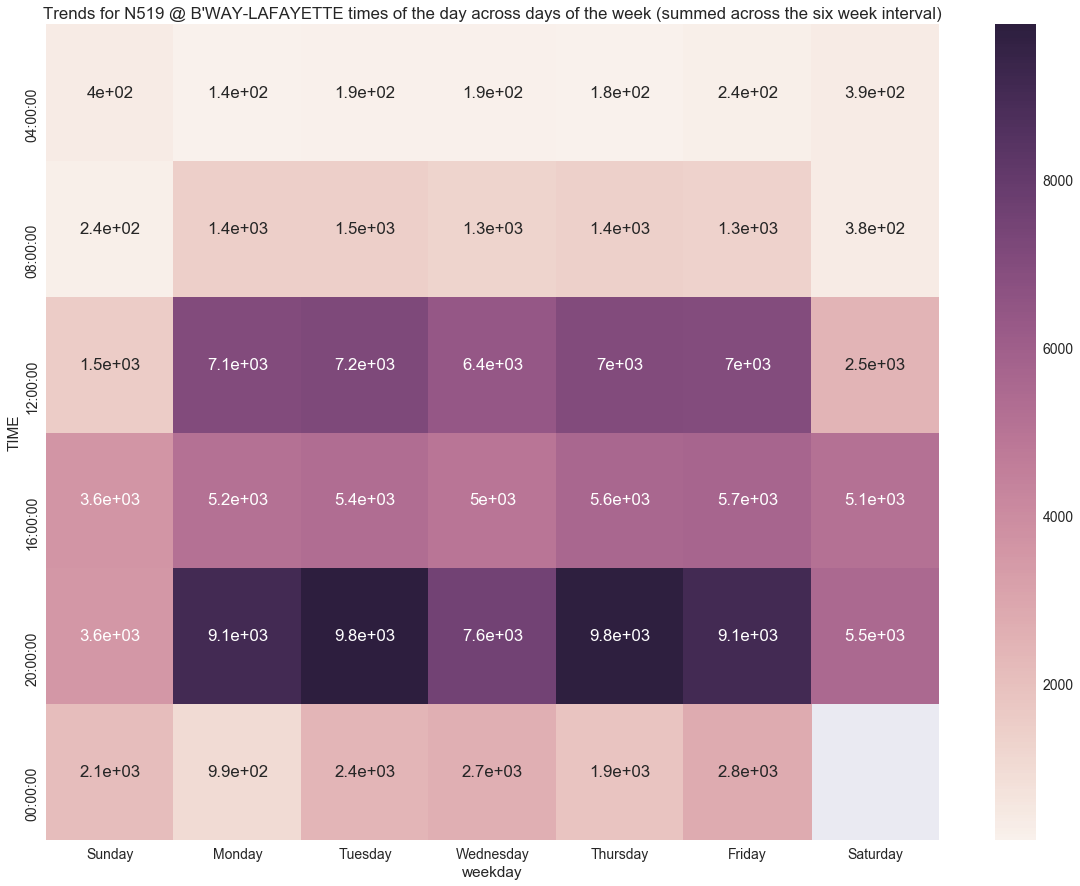

In [425]:
df_mta["station_CA_pairs"] = df_mta["CA"] + " @ " + df_mta["STATION"]

station_ca_traffic_by_date_time=df_mta.groupby(['station_CA_pairs','DATE','TIME']).sum().sort_values(by='total_traffic', ascending=False).reset_index().copy()

specific_station_ca_pair = "N519 @ B'WAY-LAFAYETTE"

# can exclude these weeks due to snow-storm
# 3/21 - 3/18-3/24
# 3/7 - 3/4-3/10

specific_station_ca_pair_traffic_by_date_and_time = station_ca_traffic_by_date_time[station_ca_traffic_by_date_time['station_CA_pairs']==specific_station_ca_pair]
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[np.isfinite(specific_station_ca_pair_traffic_by_date_and_time['total_traffic'])].copy()
specific_station_ca_pair_traffic_by_date_and_time['DATE'] = pd.to_datetime(specific_station_ca_pair_traffic_by_date_and_time['DATE'])
specific_station_ca_pair_traffic_by_date_and_time['weekday']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.weekday_name
specific_station_ca_pair_traffic_by_date_and_time['week']=specific_station_ca_pair_traffic_by_date_and_time['DATE'].dt.week

# replacing daylight savings time values

specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['23:00:00'], '00:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['03:00:00'], '04:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['07:00:00'], '08:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['11:00:00'], '12:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['15:00:00'], '16:00:00')
specific_station_ca_pair_traffic_by_date_and_time['TIME'].replace(['19:00:00'], '20:00:00')

# keep only 4-hour interval values

timelist = ['00:00:00', '04:00:00', '08:00:00',
            '12:00:00', '16:00:00', '20:00:00']
specific_station_ca_pair_traffic_by_date_and_time = specific_station_ca_pair_traffic_by_date_and_time[specific_station_ca_pair_traffic_by_date_and_time['TIME'].isin(timelist)]

# turn times into datetime values

specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].apply(pd.to_datetime)
specific_station_ca_pair_traffic_by_date_and_time['TIME'] = specific_station_ca_pair_traffic_by_date_and_time['TIME'].dt.time

# make a pivot table and manually assign weekday order

df = specific_station_ca_pair_traffic_by_date_and_time.pivot_table(index='TIME', columns='weekday', values='total_traffic')
cols = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday']
df.index = pd.CategoricalIndex(df.index, categories= [datetime.strptime('04:00:00', '%H:%M:%S').time(), datetime.strptime('08:00:00', '%H:%M:%S').time(),datetime.strptime('12:00:00', '%H:%M:%S').time(), datetime.strptime('16:00:00', '%H:%M:%S').time(), datetime.strptime('20:00:00', '%H:%M:%S').time(), datetime.strptime('00:00:00', '%H:%M:%S').time()])
df.sort_index(level=0, inplace=True)
df = df[cols]

savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Trends for " + specific_station_ca_pair + " times of the day across days of the week (summed across the six week interval)"
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'reordered_times.pdf', bbox_inches="tight")
plt.savefig(fullpath+'.png', bbox_inches="tight")

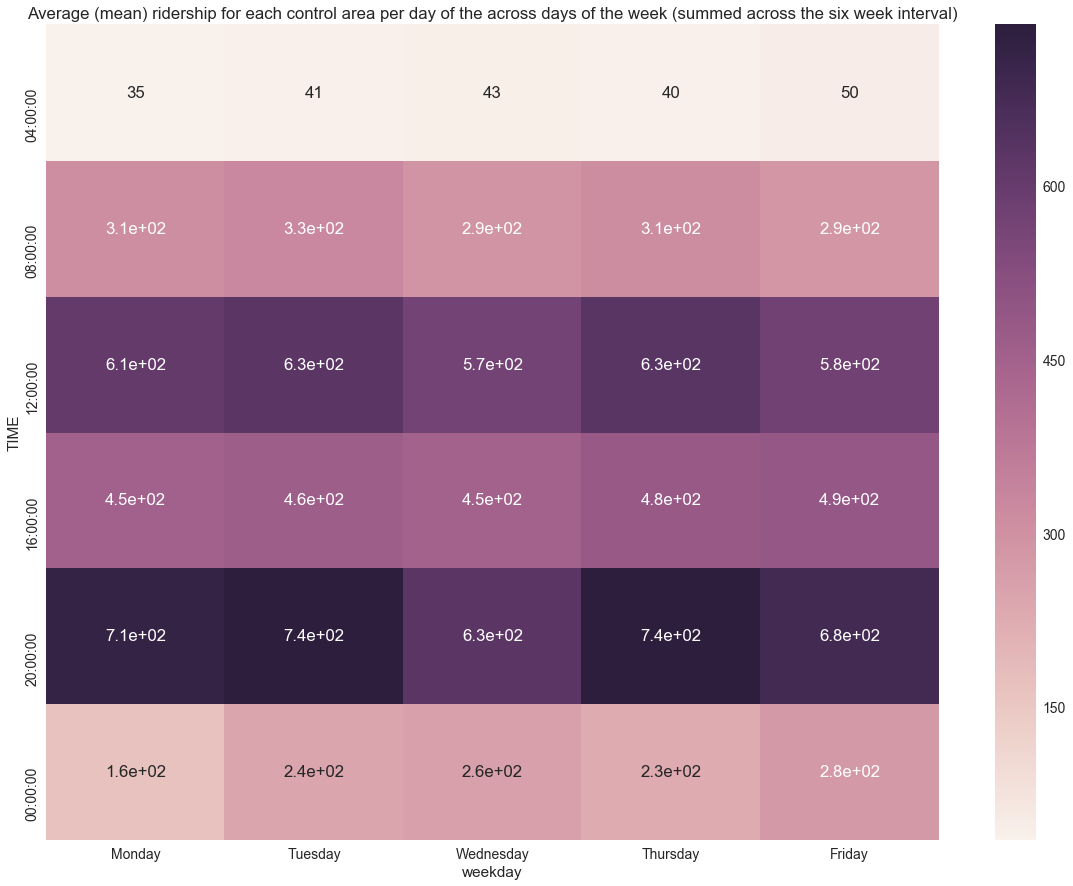

In [426]:
mean_traffic_by_date_time=df_mta.groupby(['CA','DATE','TIME']).mean().sort_values(by='total_traffic', ascending=False).reset_index().copy()

mean_traffic_by_date_time = mean_traffic_by_date_time[np.isfinite(mean_traffic_by_date_time['total_traffic'])].copy()

mean_traffic_by_date_time['DATE'] = pd.to_datetime(mean_traffic_by_date_time['DATE'])
mean_traffic_by_date_time['weekday']=mean_traffic_by_date_time['DATE'].dt.weekday_name
mean_traffic_by_date_time['week']=mean_traffic_by_date_time['DATE'].dt.week

# replacing daylight savings time values

mean_traffic_by_date_time['TIME'].replace(['23:00:00'], '00:00:00')
mean_traffic_by_date_time['TIME'].replace(['03:00:00'], '04:00:00')
mean_traffic_by_date_time['TIME'].replace(['07:00:00'], '08:00:00')
mean_traffic_by_date_time['TIME'].replace(['11:00:00'], '12:00:00')
mean_traffic_by_date_time['TIME'].replace(['15:00:00'], '16:00:00')
mean_traffic_by_date_time['TIME'].replace(['19:00:00'], '20:00:00')

# keep only 4-hour interval values

timelist = ['00:00:00', '04:00:00', '08:00:00',
            '12:00:00', '16:00:00', '20:00:00']
mean_traffic_by_date_time = mean_traffic_by_date_time[mean_traffic_by_date_time['TIME'].isin(timelist)]

# turn times into datetime values

mean_traffic_by_date_time['TIME'] = mean_traffic_by_date_time['TIME'].apply(pd.to_datetime)
mean_traffic_by_date_time['TIME'] = mean_traffic_by_date_time['TIME'].dt.time

# make a pivot table and manually assign weekday order and the order of the times

df = mean_traffic_by_date_time.pivot_table(index='TIME', columns='weekday', values='total_traffic')
cols = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday']
df.index = pd.CategoricalIndex(df.index, categories= [datetime.strptime('04:00:00', '%H:%M:%S').time(), datetime.strptime('08:00:00', '%H:%M:%S').time(),datetime.strptime('12:00:00', '%H:%M:%S').time(), datetime.strptime('16:00:00', '%H:%M:%S').time(), datetime.strptime('20:00:00', '%H:%M:%S').time(), datetime.strptime('00:00:00', '%H:%M:%S').time()])
df.sort_index(level=0, inplace=True)
df = df[cols]

savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Average (mean) ridership for each control area per day of the across days of the week (summed across the six week interval)"
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'.pdf', bbox_inches="tight")
plt.savefig(fullpath+'.png', bbox_inches="tight")

In [ ]:
datetime.time()
station_traffic_by_date_Penn = station_traffic_by_date_top_15[station_traffic_by_date_top_15['STATION']=="34 ST-PENN STA"]
station_traffic_by_date_Penn = station_traffic_by_date_Penn[np.isfinite(station_traffic_by_date_Penn['total_traffic'])].copy()
station_traffic_by_date_Penn['DATE'] = pd.to_datetime(station_traffic_by_date_Penn['DATE'])
station_traffic_by_date_Penn['weekday']=station_traffic_by_date_Penn['DATE'].dt.weekday_name
station_traffic_by_date_Penn['time']=station_traffic_by_date_Penn['datetime'].dt.time

df = station_traffic_by_date_Penn.pivot_table(index='time', columns='weekday', values='total_traffic')

savepath='/Users/etheredgej/ds/metis/metisgh/'
title="Trends for Penn Station days of the week across the weeks sampled"
sns.set(font_scale=1.4)
plt.figure(figsize=(20,15))
plt.title(title)
ax=subplot(111)
sns.heatmap(df,ax=ax,annot=True)
fullpath=savepath+(title).replace(" ", "_").replace("/", " or ")
plt.savefig(fullpath+'.pdf')



(array([ -20000.,       0.,   20000.,   40000.,   60000.,   80000.,  100000.]),
 <a list of 7 Text xticklabel objects>)

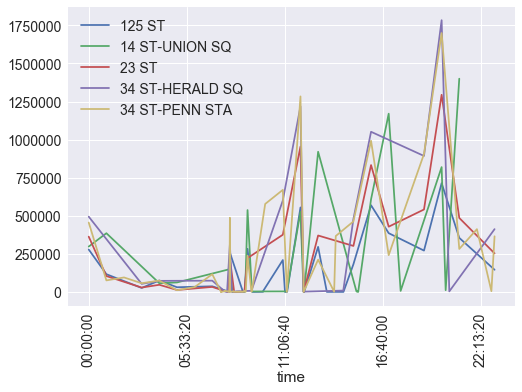

In [377]:
station_top_15 = df_mta[df_mta['STATION'].isin(
    station_traffic_sum_top_15_list)].copy()
timelist = ['00:00:00', '04:00:00', '08:00:00',
            '12:00:00', '16:00:00', '20:00:00']
#station_top_15 = station_top_15[station_top_15['TIME'].isin(timelist)]
#station_top_15['TIME'] = pd.to_datetime(station_top_15['TIME'])
station_top_15_by_time_sum = station_top_15.groupby(['STATION', 'TIME']).sum().reset_index().copy()

for current_station in station_top_15_by_time_sum.STATION.unique()[:5]:
    df_to_plot = station_top_15_by_time_sum[station_top_15_by_time_sum["STATION"]
                                == current_station].copy()
    #df_to_plot['DATETIME'] = df_to_plot['DATE'].apply(pd.to_datetime)
    df_to_plot['TIME'] = df_to_plot['TIME'].apply(pd.to_datetime)
    x = df_to_plot["TIME"].dt.time.copy()
    y = df_to_plot["total_traffic"].copy()
    plt.plot(x, y, label=current_station)

legend()
plt.xticks(rotation=90)

In [376]:
timelist=['00:00:00','04:00:00','08:00:00','12:00:00','16:00:00','20:00:00']
station_top_15 = station_top_15[station_top_15['TIME'].isin(timelist)].copy()
station_top_15.TIME.unique()

array(['04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00',
       '00:00:00'], dtype=object)